## 1.0 QR Code Generation (from student.json)


In [2]:
import qrcode
import os
import json

# Load the data
json_path = os.path.join(os.getcwd(),"..//data", "student.json")

with open(json_path, "r", encoding="utf-8") as f:
    student = json.load(f)

students = {
    s["student_id"]: {"name": s["name"], "seat": s["seat"]}
    for s in student["students"]
}

save_dir = os.path.join(os.getcwd(),"..//data", "qrcode")
os.makedirs(save_dir, exist_ok=True)

for student_id in students:
    qr = qrcode.make(student_id)
    out_path = os.path.join(save_dir, f"{student_id}.png")
    qr.save(out_path)
    print(f"✅ QR code saved: {out_path}")


✅ QR code saved: c:\Users\jians\Downloads\BMDS2133 Image Processing\BMDS2133 Image Processing\notebooks\..//data\qrcode\24WMR11249.png
✅ QR code saved: c:\Users\jians\Downloads\BMDS2133 Image Processing\BMDS2133 Image Processing\notebooks\..//data\qrcode\24WMR08872.png
✅ QR code saved: c:\Users\jians\Downloads\BMDS2133 Image Processing\BMDS2133 Image Processing\notebooks\..//data\qrcode\24WMR08889.png
✅ QR code saved: c:\Users\jians\Downloads\BMDS2133 Image Processing\BMDS2133 Image Processing\notebooks\..//data\qrcode\24WMR08885.png


## 1.1 Live QR Scanner

In [3]:
import cv2 

EVENT_NAME = student.get("event", {}).get("name", "Event")
VENUE      = student.get("event", {}).get("session", {}).get("venue", "")

# Mark the last 4 characters of the student ID
def mask_student_id(sid: str, last_n_hidden: int = 4) -> str:
    if not sid:
        return sid
    n = max(0, min(last_n_hidden, len(sid)))
    return sid[:-n] + ("*" * n)

def print_confirm(event_name: str, venue: str, sid: str, student: dict) -> None:
    print("\nQR Scan Received")
    print("Event :", event_name)
    if venue:
        print("Location :", venue)
    print("Name  :", student["name"])
    print("ID    :", f"{mask_student_id(sid, 4)}")
    print("Seat  :", student["seat"])

def run_scanner():
    detector = cv2.QRCodeDetector()
    cap = cv2.VideoCapture(0)
    print("📷 Starting QR scanner... SPACE=confirm & exit, Q=quit")

    current_sid, current_student = None, None

    while True:
        ret, frame = cap.read()
        if not ret:
            break

        data, points, _ = detector.detectAndDecode(frame)

        if data:
            sid = data.strip()
            if sid != current_sid:
                current_sid = sid
                current_student = students.get(sid)

            # On camera: show only the NAME
            if current_student:
                cv2.putText(frame, current_student["name"], (30, 50),
                            cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)
            else:
                cv2.putText(frame, "Unknown ID", (30, 50),
                            cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 0, 255), 2)

            # Draw QR polygon if present
            if points is not None:
                pts = points.astype(int).reshape(-1, 2)
                for j in range(len(pts)):
                    pt1 = tuple(pts[j]); pt2 = tuple(pts[(j+1) % len(pts)])
                    cv2.line(frame, pt1, pt2, (0, 255, 0), 2)

        cv2.imshow("QR Code Scanner", frame)

        k = cv2.waitKey(1) & 0xFF
        if k == ord('q'):
            break
        # SPACE key to confirm
        elif k == 32:
            if current_sid and current_student:
                print_confirm(EVENT_NAME, VENUE, current_sid, current_student)
            break

    cap.release()
    cv2.destroyAllWindows()

run_scanner()


📷 Starting QR scanner... SPACE=confirm & exit, Q=quit

QR Scan Received
Event : Convocation 2025 - FCIT - Session 2
Location : Dewan Utama
Name  : Lee Jian Sheng
ID    : 24WMR0****
Seat  : A13


# 2.0 Exploratory Data Analysis (EDA)

## 2.1 Dataset Summary, Class Counts, Bar Chart, and Sample Images

Total classes: 31

Classes:
Akshay Kumar, Alexandra Daddario, Alia Bhatt, Amitabh Bachchan, Andy Samberg
Anushka Sharma, Billie Eilish, Brad Pitt, Camila Cabello, Charlize Theron
Claire Holt, Courtney Cox, Dwayne Johnson, Elizabeth Olsen, Ellen Degeneres
Henry Cavill, Hrithik Roshan, Hugh Jackman, Jessica Alba, Kashyap
Lisa Kudrow, Margot Robbie, Marmik, Natalie Portman, Priyanka Chopra
Robert Downey Jr, Roger Federer, Tom Cruise, Vijay Deverakonda, Virat Kohli
Zac Efron
Total images: 2562

Class counts:
Akshay Kumar: 50 , Alexandra Daddario: 92 , Alia Bhatt: 79
Amitabh Bachchan: 74 , Andy Samberg: 92 , Anushka Sharma: 68
Billie Eilish: 98 , Brad Pitt: 120 , Camila Cabello: 87
Charlize Theron: 78 , Claire Holt: 96 , Courtney Cox: 80
Dwayne Johnson: 61 , Elizabeth Olsen: 71 , Ellen Degeneres: 75
Henry Cavill: 106 , Hrithik Roshan: 101 , Hugh Jackman: 112
Jessica Alba: 108 , Kashyap: 30 , Lisa Kudrow: 70
Margot Robbie: 72 , Marmik: 32 , Natalie Portman: 105
Priyanka Chopra: 102 , Robert 

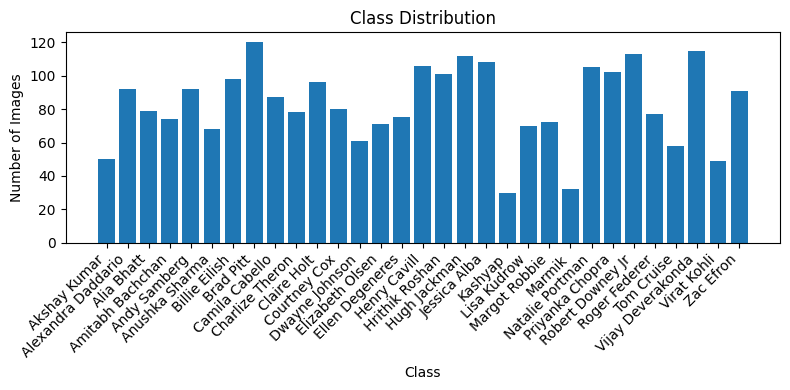

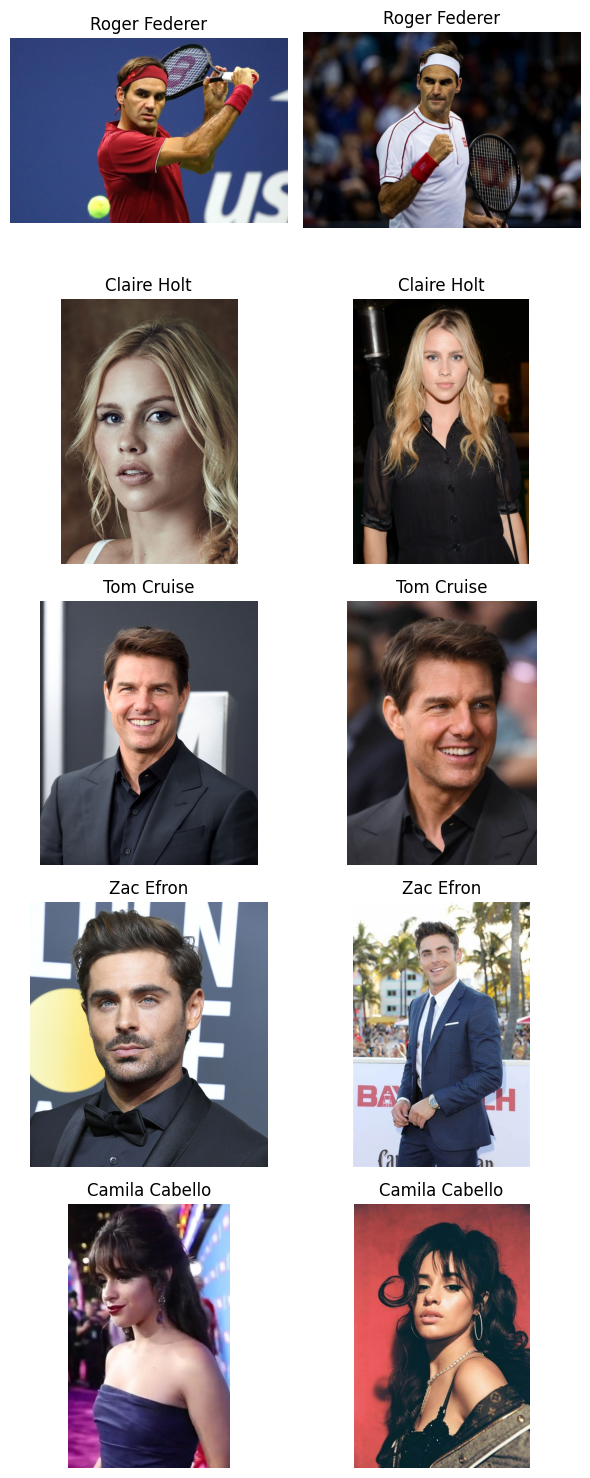

In [8]:
import os
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
from glob import glob
from PIL import Image

# Path to raw dataset directory
eda_faces_dir = os.path.join('..', 'data', 'dataset', 'raw')
eda_class_dirs = [d for d in os.listdir(eda_faces_dir) if os.path.isdir(os.path.join(eda_faces_dir, d))]

# Count images per class
eda_class_counts = {}
for eda_class_name in eda_class_dirs:
    eda_img_files = glob(os.path.join(eda_faces_dir, eda_class_name, '*'))
    eda_class_counts[eda_class_name] = len(eda_img_files)

# Dataset summary
print(f"Total classes: {len(eda_class_dirs)}")

# Print classes, 5 per row
print("\nClasses:")
for i in range(0, len(eda_class_dirs), 5):
    print(', '.join(eda_class_dirs[i:i+5]))

print(f"Total images: {sum(eda_class_counts.values())}")

# Print class counts, 3 per row
print("\nClass counts:")
eda_class_items = list(eda_class_counts.items())
for i in range(0, len(eda_class_items), 3):
    row = [f"{k}: {v}" for k, v in eda_class_items[i:i+3]]
    print(' , '.join(row))

# Bar chart of class counts
plt.figure(figsize=(8,4))
plt.bar(eda_class_counts.keys(), eda_class_counts.values())
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Show 2 random images for 5 random classes
n_samples = 2
n_classes = 5
sample_classes = np.random.choice(eda_class_dirs, min(n_classes, len(eda_class_dirs)), replace=False)
fig, axes = plt.subplots(len(sample_classes), n_samples, figsize=(n_samples*3, len(sample_classes)*3))
for i, eda_class_name in enumerate(sample_classes):
    eda_img_files = glob(os.path.join(eda_faces_dir, eda_class_name, '*'))
    samples = np.random.choice(eda_img_files, min(n_samples, len(eda_img_files)), replace=False)
    for j, img_path in enumerate(samples):
        img = Image.open(img_path)
        axes[i, j].imshow(img)
        axes[i, j].set_title(f'{eda_class_name}')
        axes[i, j].axis('off')
plt.tight_layout()
plt.show()

## 2.2 Image Width, Height, and Brightness Histograms

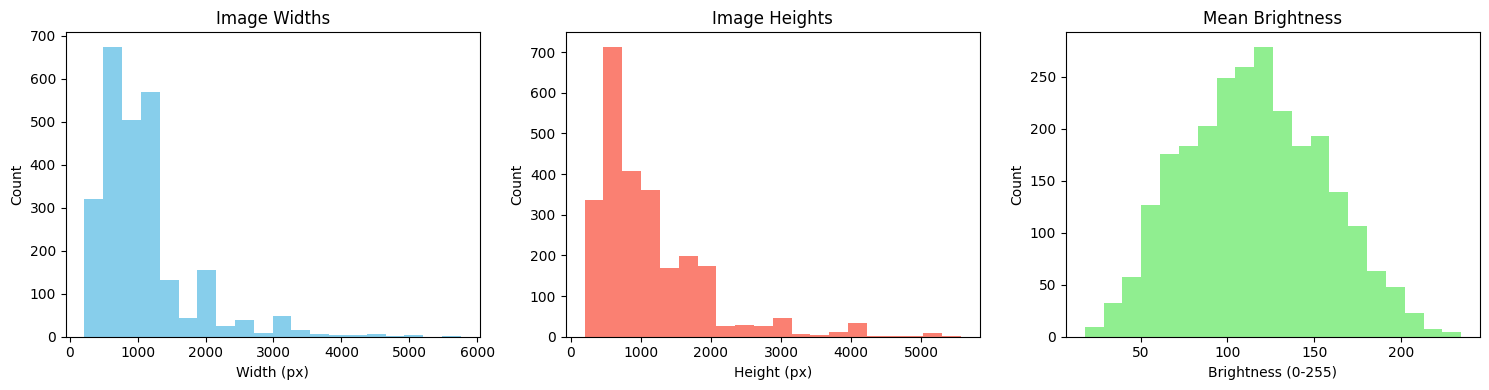

In [9]:
image_widths = []
image_heights = []
brightness = []

for eda_class_name in eda_class_dirs:
    eda_img_files = glob(os.path.join(eda_faces_dir, eda_class_name, '*'))
    for img_path in eda_img_files:
        img = Image.open(img_path).convert('L')
        arr = np.array(img)
        image_heights.append(arr.shape[0])
        image_widths.append(arr.shape[1])
        brightness.append(arr.mean())

plt.figure(figsize=(15,4))
plt.subplot(1,3,1)
plt.hist(image_widths, bins=20, color='skyblue')
plt.title('Image Widths')
plt.xlabel('Width (px)')
plt.ylabel('Count')
plt.subplot(1,3,2)
plt.hist(image_heights, bins=20, color='salmon')
plt.title('Image Heights')
plt.xlabel('Height (px)')
plt.ylabel('Count')
plt.subplot(1,3,3)
plt.hist(brightness, bins=20, color='lightgreen')
plt.title('Mean Brightness')
plt.xlabel('Brightness (0-255)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

## 2.3 Preprocessing Demo (Original, Grayscale, CLAHE, Resized)

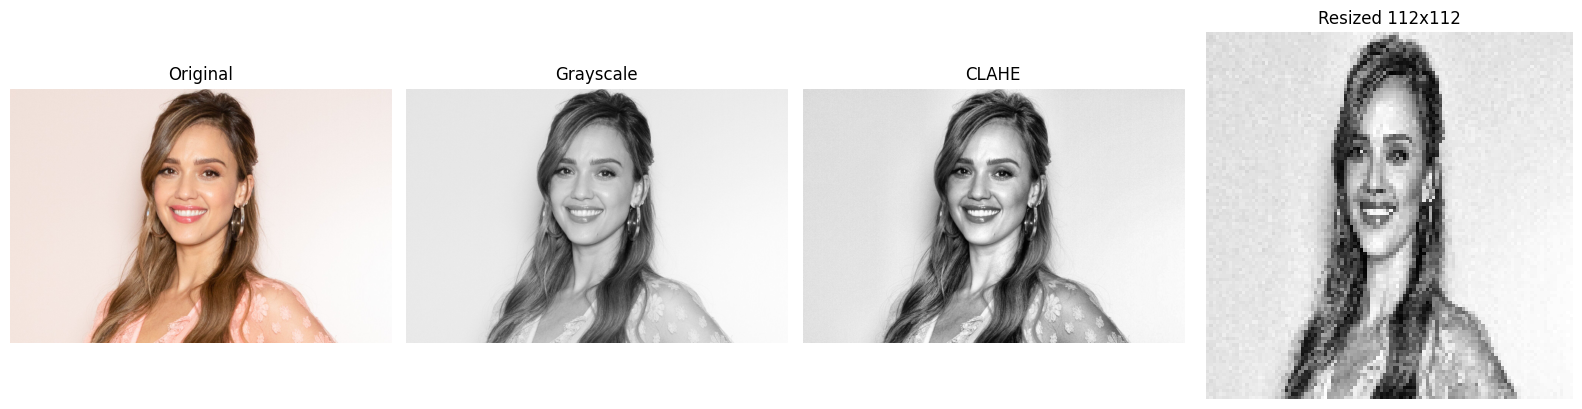

In [10]:
import random
eda_sample_class = random.choice(eda_class_dirs)
eda_sample_img_path = random.choice(glob(os.path.join(eda_faces_dir, eda_sample_class, '*')))
eda_img = Image.open(eda_sample_img_path)
eda_img_np = np.array(eda_img)

# Grayscale
eda_gray = np.array(eda_img.convert('L'))
# CLAHE
eda_clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
eda_clahe_img = eda_clahe.apply(eda_gray)
# Resized
eda_resized = cv2.resize(eda_clahe_img, (112, 112))

fig, axes = plt.subplots(1, 4, figsize=(16,4))
axes[0].imshow(eda_img_np)
axes[0].set_title('Original')
axes[0].axis('off')
axes[1].imshow(eda_gray, cmap='gray')
axes[1].set_title('Grayscale')
axes[1].axis('off')
axes[2].imshow(eda_clahe_img, cmap='gray')
axes[2].set_title('CLAHE')
axes[2].axis('off')
axes[3].imshow(eda_resized, cmap='gray')
axes[3].set_title('Resized 112x112')
axes[3].axis('off')
plt.tight_layout()
plt.show()

# 3.0 Data Preprocessing

## 3.1 Functions to be used

### 3.1.1 Face Detection using Haar

In [30]:
import cv2, os, numpy as np
import matplotlib.pyplot as plt

# Load Haar cascade for face detection
def load_face_cascade():
    candidates = [
        "models/haarcascade_frontalface_default.xml",
        os.path.join(os.getcwd(), "haarcascade_frontalface_default.xml"),
        os.path.join(cv2.data.haarcascades, "haarcascade_frontalface_default.xml"),
    ]
    for p in candidates:
        if os.path.exists(p):
            c = cv2.CascadeClassifier(p)
            if not c.empty():
                return c
    raise IOError("Haar cascade not found. Put 'haarcascade_frontalface_default.xml' in ./models/ or project root.")

_FACE_CASCADE = load_face_cascade()

def detect_largest_face_bgr(bgr_img, scaleFactor=1.1, minNeighbors=5):
    if bgr_img is None: return None, None
    gray = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2GRAY)
    faces = _FACE_CASCADE.detectMultiScale(gray, scaleFactor, minNeighbors)
    if len(faces) == 0: return None, None
    (x, y, w, h) = max(faces, key=lambda r: r[2]*r[3])
    return (x, y, w, h), bgr_img[y:y+h, x:x+w]

### 3.1.2 Image Processing Techniques (Enhancement):
1. greyScale
2. bilateral filtering
3. auto gamma
4. CLAHE
5. unsharp (gaussian blur)


In [31]:
# --- Enhancement functions (modular, can be reused) ---
def auto_gamma(img, gamma=None):
    if gamma is None:
        mean = np.mean(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY))
        gamma = np.log10(0.5*255) / np.log10(mean + 1e-6)
    invGamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** invGamma) * 255 for i in np.arange(256)]).astype("uint8")
    return cv2.LUT(img, table)

def clahe_bgr(img):
    lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
    l, a, b = cv2.split(lab)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    cl = clahe.apply(l)
    limg = cv2.merge((cl, a, b))
    return cv2.cvtColor(limg, cv2.COLOR_LAB2BGR)

def unsharp(img, amt=0.7, rad=1.5):
    blur = cv2.GaussianBlur(img, (0, 0), rad)
    return cv2.addWeighted(img, 1 + amt, blur, -amt, 0)

def bilateral_bgr(img, d=9, sigmaColor=75, sigmaSpace=75):
    # Edge-preserving smoothing (good for faces / skin)
    return cv2.bilateralFilter(img, d=d, sigmaColor=sigmaColor, sigmaSpace=sigmaSpace)

# --- Preprocessing pipeline ---
IMSIZE = 224  # CNN input size

def preprocess_image(
    img_path,
    use_bilateral=True,            # turn bilateral on/off
    bilateral_params=(9, 75, 75),  # (d, sigmaColor, sigmaSpace)
    to_grayscale=False,            # output grayscale?
    gray_three_channel=True        # if grayscale, repeat to 3ch for RGB models
):
    """
    Returns normalized image in RGB (H,W,3) float32 in [0,1].
    If to_grayscale=True and gray_three_channel=False, returns (H,W,1) array.
    """
    bgr = cv2.imread(img_path)
    if bgr is None:
        raise FileNotFoundError(f"Cannot read image: {img_path}")

    (box, crop) = detect_largest_face_bgr(bgr)
    if crop is None:
        print("❌ No face detected!")
        return None

    # 1) Tone & contrast
    x = auto_gamma(crop)
    x = clahe_bgr(x)

    # 2) Optional edge-preserving smoothing
    if use_bilateral:
        d, sc, ss = bilateral_params
        x = bilateral_bgr(x, d=d, sigmaColor=sc, sigmaSpace=ss)

    # 3) Sharpen after smoothing (regains crisp edges)
    x = unsharp(x, amt=0.7, rad=1.5)

    # 4) Resize
    x = cv2.resize(x, (IMSIZE, IMSIZE), interpolation=cv2.INTER_AREA)

    # 5) Optional grayscale
    if to_grayscale:
        gray = cv2.cvtColor(x, cv2.COLOR_BGR2GRAY)  # (H,W)
        if gray_three_channel:
            # Stack to 3 channels so RGB models still work
            x = cv2.cvtColor(gray, cv2.COLOR_GRAY2RGB)  # (H,W,3)
        else:
            # Keep single channel
            x = gray[..., None]  # (H,W,1)
            x = x.astype(np.float32) / 255.0
            return x

    # 6) Final to RGB + normalize
    rgb = cv2.cvtColor(x, cv2.COLOR_BGR2RGB).astype(np.float32) / 255.0
    return rgb


## 3.2 Implementation of these functions

Note: 


1. *Just process, don’t plot, don’t save*

img = visualize_pipeline("face.jpg", plot=False)




2. *Process + save, but don’t plot*

img = visualize_pipeline("face.jpg", save_processed=True, plot=False)




3. *Process + plot (default), no saving*

img = visualize_pipeline("face.jpg")


### 3.2.1 function to visualize processed img

In [32]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

# --- Enhancement functions assumed defined earlier: auto_gamma, clahe_bgr, unsharp, bilateral_bgr ---

IMSIZE = 224  # fixed input size for CNNs

def visualize_pipeline(img_path, save_processed=False, save_dir="processed_outputs", plot=True):
    """
    Visualize preprocessing pipeline with bilateral + grayscale enabled by default.

    Parameters
    ----------
    img_path : str
        Path to the input image.
    save_processed : bool
        Whether to save the final processed image.
    save_dir : str
        Directory to save processed image if save_processed=True.
    plot : bool
        Whether to show the matplotlib visualization of the pipeline.
    """
    bgr = cv2.imread(img_path)
    if bgr is None:
        print("❌ Cannot read the image. Check path.")
        return None

    (box, crop) = detect_largest_face_bgr(bgr)
    if crop is None:
        print("❌ No face detected in the image!")
        return None

    # Draw detection box
    x, y, w, h = box
    bgr_box = bgr.copy()
    cv2.rectangle(bgr_box, (x, y), (x + w, y + h), (0, 255, 0), 3)

    # Individual steps
    step_auto    = auto_gamma(crop)
    step_clahe   = clahe_bgr(crop)
    step_unsharp = unsharp(crop, amt=0.7, rad=1.5)
    step_bilat   = bilateral_bgr(crop, d=9, sigmaColor=75, sigmaSpace=75)
    step_gray    = cv2.cvtColor(crop, cv2.COLOR_BGR2GRAY)

    # Pipeline with bilateral before unsharp
    combo_bilat = unsharp(
        bilateral_bgr(clahe_bgr(auto_gamma(crop)), d=9, sigmaColor=75, sigmaSpace=75),
        amt=0.7, rad=1.5
    )

    # Final processed (grayscale → 3-channel, resized, normalized)
    gray_final  = cv2.cvtColor(combo_bilat, cv2.COLOR_BGR2GRAY)
    gray_3ch    = cv2.cvtColor(gray_final, cv2.COLOR_GRAY2BGR)
    final_bgr   = cv2.resize(gray_3ch, (IMSIZE, IMSIZE), interpolation=cv2.INTER_AREA)
    final_rgb   = cv2.cvtColor(final_bgr, cv2.COLOR_BGR2RGB).astype(np.float32) / 255.0

    # Save if requested
    if save_processed:
        os.makedirs(save_dir, exist_ok=True)
        out_path = os.path.join(save_dir, os.path.basename(img_path).replace(".jpg", "_processed.png"))
        cv2.imwrite(out_path, (final_rgb * 255).astype(np.uint8)[:, :, ::-1])  # back to BGR for saving
        print(f"✅ Processed image saved at: {out_path}")

    # Plot if requested
    if plot:
        def show(ax, img, title, is_bgr=True):
            if img.ndim == 2:
                ax.imshow(img, cmap='gray')
            else:
                if is_bgr:
                    ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
                else:
                    ax.imshow(img)
            ax.set_title(title, fontsize=10)
            ax.axis('off')

        plt.figure(figsize=(22, 9))
        ax = plt.subplot(2, 5, 1);  show(ax, bgr_box,      "Original + Detection", is_bgr=True)
        ax = plt.subplot(2, 5, 2);  show(ax, crop,         "Cropped Face",         is_bgr=True)
        ax = plt.subplot(2, 5, 3);  show(ax, step_auto,    "Auto-Gamma",           is_bgr=True)
        ax = plt.subplot(2, 5, 4);  show(ax, step_clahe,   "CLAHE",                is_bgr=True)
        ax = plt.subplot(2, 5, 5);  show(ax, step_unsharp, "Unsharp",              is_bgr=True)
        ax = plt.subplot(2, 5, 6);  show(ax, step_bilat,   "Bilateral",            is_bgr=True)
        ax = plt.subplot(2, 5, 7);  show(ax, step_gray,    "Grayscale",            is_bgr=False)
        ax = plt.subplot(2, 5, 8);  show(ax, combo_bilat,  "Pipeline\n(Gamma→CLAHE→Bilateral→Unsharp)", is_bgr=True)
        ax = plt.subplot(2, 5, 9);  show(ax, gray_3ch,     "Pipeline + Grayscale 3ch", is_bgr=True)
        ax = plt.subplot(2, 5,10);  show(ax, final_rgb,    f"Final Normalized\n{IMSIZE}×{IMSIZE}", is_bgr=False)

        plt.suptitle("Preprocessing Pipeline — Bilateral + Grayscale Enabled", fontsize=14, fontweight="bold")
        plt.tight_layout(rect=[0, 0, 1, 0.96])
        plt.show()

    return final_rgb


### 3.2.2 Visualize the preprocessed image 

- One Image is processed for testing

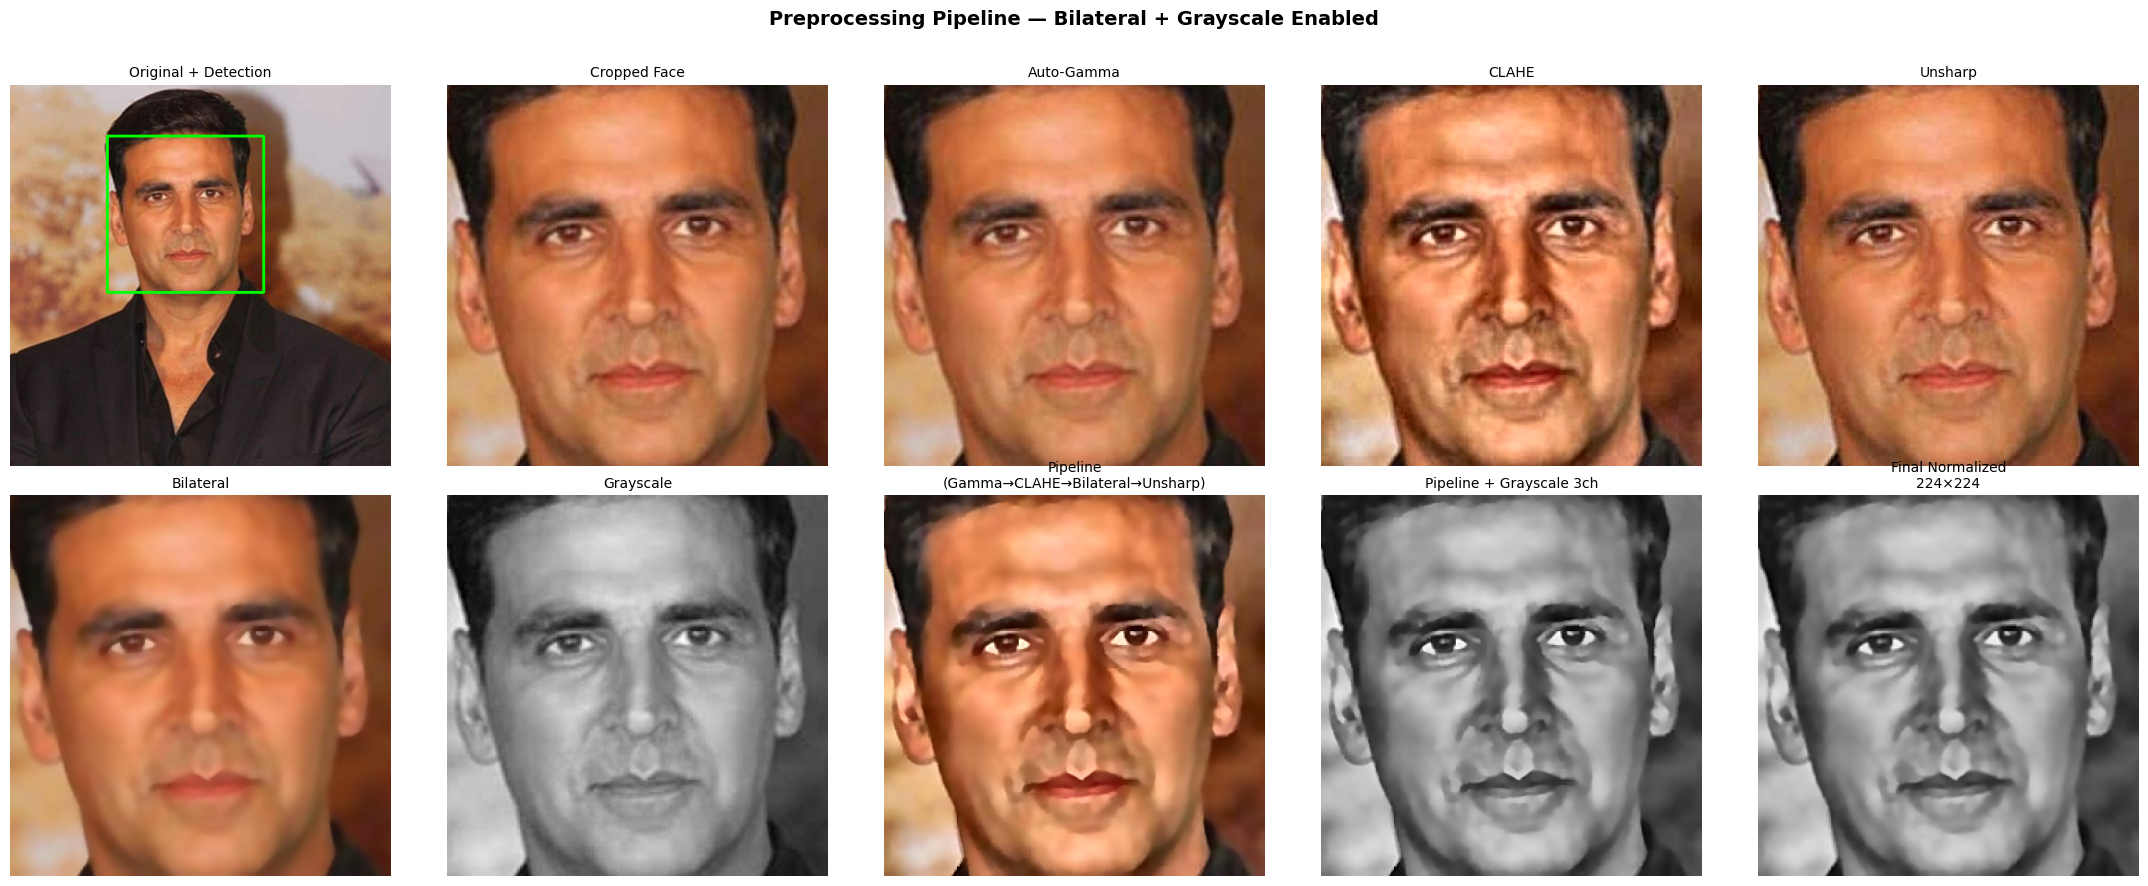

array([[[0.43529412, 0.43529412, 0.43529412],
        [0.19215687, 0.19215687, 0.19215687],
        [0.14117648, 0.14117648, 0.14117648],
        ...,
        [0.45882353, 0.45882353, 0.45882353],
        [0.44705883, 0.44705883, 0.44705883],
        [0.44313726, 0.44313726, 0.44313726]],

       [[0.42745098, 0.42745098, 0.42745098],
        [0.19215687, 0.19215687, 0.19215687],
        [0.13725491, 0.13725491, 0.13725491],
        ...,
        [0.45882353, 0.45882353, 0.45882353],
        [0.44705883, 0.44705883, 0.44705883],
        [0.44313726, 0.44313726, 0.44313726]],

       [[0.39607844, 0.39607844, 0.39607844],
        [0.15686275, 0.15686275, 0.15686275],
        [0.13333334, 0.13333334, 0.13333334],
        ...,
        [0.45882353, 0.45882353, 0.45882353],
        [0.45490196, 0.45490196, 0.45490196],
        [0.4509804 , 0.4509804 , 0.4509804 ]],

       ...,

       [[0.46666667, 0.46666667, 0.46666667],
        [0.47058824, 0.47058824, 0.47058824],
        [0.47058824, 0

In [33]:
path = os.path.join(os.getcwd(), "..", "data", "dataset", "raw", "Akshay Kumar", "Akshay Kumar_1.jpg")
visualize_pipeline(path)

### 3.2.3 Implement on dataset

1. Train Test Split 
2. implement preprocess func and save it

In [34]:
# ===== Shared core (same result/order as your visualize) =====
from pathlib import Path
import glob, shutil, random

IMSIZE = 224  # keep consistent with your visualizer
IMG_EXTS = ("*.jpg","*.jpeg","*.png","*.bmp","*.webp")

def preprocess_face_bgr(bgr, out_size=IMSIZE):
    """
    Returns final BGR uint8 face tile of shape (out_size, out_size, 3),
    or None if no face detected. Order matches visualize:
    Gamma → CLAHE → Bilateral → Unsharp → Gray → 3ch → Resize
    """
    box, crop = detect_largest_face_bgr(bgr)
    if crop is None:
        return None

    x = auto_gamma(crop)
    x = clahe_bgr(x)
    x = bilateral_bgr(x, d=9, sigmaColor=75, sigmaSpace=75)
    x = unsharp(x, amt=0.7, rad=1.5)
    gray   = cv2.cvtColor(x, cv2.COLOR_BGR2GRAY)
    gray3  = cv2.cvtColor(gray, cv2.COLOR_GRAY2BGR)
    final  = cv2.resize(gray3, (out_size, out_size), interpolation=cv2.INTER_AREA)
    return final  # BGR uint8

# ===== Utilities =====
def _list_images(person_dir: Path):
    files = []
    for ext in IMG_EXTS:
        files += person_dir.glob(ext)
    return sorted(files)

def _split_indices(n, train_p=0.70, val_p=0.15, seed=42):
    idx = list(range(n))
    rng = random.Random(seed)
    rng.shuffle(idx)
    n_train = int(n * train_p)
    n_val   = int(n * val_p)
    train_idx = idx[:n_train]
    val_idx   = idx[n_train:n_train+n_val]
    test_idx  = idx[n_train+n_val:]
    return train_idx, val_idx, test_idx

# ===== Build processed dataset (writes to ./dataset/processed) =====
def build_processed_dataset(
    raw_root: Path,
    out_root: Path = Path("../data/dataset/processed"),
    out_size: int = IMSIZE,
    split = {"train":0.70, "val":0.15, "test":0.15},
    min_images_per_person: int = 2,
    overwrite: bool = True,
    seed: int = 42
):
    assert abs(sum(split.values()) - 1.0) < 1e-6, "Split ratios must sum to 1."

    # prepare output dirs
    if overwrite and out_root.exists():
        shutil.rmtree(out_root)
    for s in ("train","val","test"):
        (out_root/s).mkdir(parents=True, exist_ok=True)

    persons = sorted([p for p in Path(raw_root).iterdir() if p.is_dir()])
    kept = skipped = 0

    for person_dir in persons:
        imgs = _list_images(person_dir)
        if len(imgs) < min_images_per_person:
            print(f"Skipping '{person_dir.name}' (not enough images: {len(imgs)}).")
            continue

        crops = []
        for p in imgs:
            bgr = cv2.imread(str(p))
            if bgr is None:
                skipped += 1
                continue
            face = preprocess_face_bgr(bgr, out_size=out_size)
            if face is None:
                skipped += 1
                continue
            crops.append((p, face))

        if len(crops) < min_images_per_person:
            print(f"Skipping '{person_dir.name}' (no usable faces).")
            continue

        # deterministic per-person split
        ti, vi, si = _split_indices(len(crops), split["train"], split["val"], seed=(seed + hash(person_dir.name)) & 0xFFFF)

        for sname, sidxs in (("train", ti), ("val", vi), ("test", si)):
            outp = out_root / sname / person_dir.name
            outp.mkdir(parents=True, exist_ok=True)
            for k in sidxs:
                src_path, img = crops[k]
                out_name = f"{Path(src_path).stem}.jpg"  # keep original stem for traceability
                cv2.imwrite(str(outp / out_name), img)
                kept += 1

    print(f"[DONE] Kept: {kept} | Skipped: {skipped}")
    for s in ("train","val","test"):
        print(s, "classes:", len(list((out_root/s).glob("*"))))




In [35]:
# ===== Example call (uncomment + edit the path) =====
RAW_DIR = Path(r"..\data\dataset\raw")  # raw/{person}/*.jpg
build_processed_dataset(RAW_DIR)        # outputs to ./dataset/processed

[DONE] Kept: 2476 | Skipped: 86
train classes: 31
val classes: 31
test classes: 31


# 4.0 CNN (MobileNet)

## 4.1 load into ds then tf

In [17]:
import tensorflow as tf
from pathlib import Path

PROC_DIR = Path("..\data\dataset\processed")   # <-- your preprocessed dataset root
IMSIZE = 224
BATCH = 32
SEED = 42

train_ds = tf.keras.utils.image_dataset_from_directory(
    PROC_DIR/"train", image_size=(IMSIZE, IMSIZE), batch_size=BATCH,
    label_mode="categorical", shuffle=True, seed=SEED
)
val_ds = tf.keras.utils.image_dataset_from_directory(
    PROC_DIR/"val", image_size=(IMSIZE, IMSIZE), batch_size=BATCH,
    label_mode="categorical", shuffle=False
)
test_ds = tf.keras.utils.image_dataset_from_directory(
    PROC_DIR/"test", image_size=(IMSIZE, IMSIZE), batch_size=BATCH,
    label_mode="categorical", shuffle=False
)

NUM_CLASSES = train_ds.element_spec[1].shape[-1]
print("Classes:", NUM_CLASSES)


Found 1719 files belonging to 31 classes.
Found 358 files belonging to 31 classes.
Found 399 files belonging to 31 classes.
Classes: 31


In [18]:
from tensorflow.keras import layers as L

data_augment = tf.keras.Sequential([
    L.RandomFlip("horizontal"),
    L.RandomZoom(0.1),
    L.RandomContrast(0.1),
])

def prep_pipeline(ds, train=False):
    ds = ds.map(lambda x,y: (tf.cast(x, tf.float32)/255.0, y), num_parallel_calls=tf.data.AUTOTUNE)
    if train:
        ds = ds.map(lambda x,y: (data_augment(x, training=True), y), num_parallel_calls=tf.data.AUTOTUNE)
        ds = ds.shuffle(1000, seed=SEED)
    return ds.cache().prefetch(tf.data.AUTOTUNE)

train_tf = prep_pipeline(train_ds, train=True)
val_tf   = prep_pipeline(val_ds,   train=False)
test_tf  = prep_pipeline(test_ds,  train=False)


## 4.2 Load Model

In [41]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import Model, Input
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

base = MobileNetV2(include_top=False, weights="imagenet", input_shape=(IMSIZE,IMSIZE,3))
base.trainable = False  # freeze backbone first

inp = Input((IMSIZE,IMSIZE,3))
x = base(inp, training=False)
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)
emb = Dense(128, activation="relu", name="embedding")(x)
x = Dropout(0.3)(emb)
out = Dense(NUM_CLASSES, activation="softmax")(x)
model = Model(inp, out)

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
model.summary()


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding (Dense)               │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 31)             │         3,999 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,425,951 (9.25 MB)

 Trainable params: 167,967 (656.12 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

## 4.3 Train and Test Model

In [43]:
import os, tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

os.makedirs("../output/checkpoints_mnet", exist_ok=True)
os.makedirs("../output/artifacts_mnet", exist_ok=True)

# --- Callbacks (save full model in .keras format) ---
cbs = [
    EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True),
    ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=3, min_lr=1e-6),
    ModelCheckpoint(
        filepath="../output/checkpoints_mnet/best_mnetv2.keras",   # <- native Keras format
        monitor="val_loss",
        save_best_only=True,                        # keep only the best epoch
        save_weights_only=False                     # save full model+optimizer
    ),
]

# --- Warm-up (frozen backbone) ---
hist1 = model.fit(train_tf, validation_data=val_tf, epochs=8, callbacks=cbs)

# --- Safer fine-tune: unfreeze only the last ~25 layers; keep BatchNorm frozen ---
UNFREEZE_LAST = 25

for layer in base.layers:
    layer.trainable = False

for layer in base.layers[-UNFREEZE_LAST:]:
    if isinstance(layer, tf.keras.layers.BatchNormalization):
        layer.trainable = False
    else:
        layer.trainable = True

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

# --- Fine-tune ---
hist2 = model.fit(train_tf, validation_data=val_tf, epochs=20, callbacks=cbs)

# --- Save the final state (last epoch) in .keras too ---
model.save("../output/artifacts_mnet/final_mnetv2.keras")   # includes architecture, weights, optimizer state

# (optional) Evaluate using the BEST checkpoint (usually better than last epoch)
best = tf.keras.models.load_model("../output/checkpoints_mnet/best_mnetv2.keras")
test_loss, test_acc = best.evaluate(test_tf)
print("Test accuracy (best):", test_acc)


Epoch 1/8
54/54 ━━━━━━━━━━━━━━━━━━━━ 28s 520ms/step - accuracy: 0.7627 - loss: 0.7835 - val_accuracy: 0.6006 - val_loss: 1.3440 - learning_rate: 1.0000e-05
Epoch 2/8
54/54 ━━━━━━━━━━━━━━━━━━━━ 28s 520ms/step - accuracy: 0.7627 - loss: 0.7835 - val_accuracy: 0.6006 - val_loss: 1.3440 - learning_rate: 1.0000e-05
Epoch 2/8
54/54 ━━━━━━━━━━━━━━━━━━━━ 34s 631ms/step - accuracy: 0.7824 - loss: 0.7138 - val_accuracy: 0.6061 - val_loss: 1.3352 - learning_rate: 1.0000e-05
Epoch 3/8
54/54 ━━━━━━━━━━━━━━━━━━━━ 34s 631ms/step - accuracy: 0.7824 - loss: 0.7138 - val_accuracy: 0.6061 - val_loss: 1.3352 - learning_rate: 1.0000e-05
Epoch 3/8
54/54 ━━━━━━━━━━━━━━━━━━━━ 41s 639ms/step - accuracy: 0.7888 - loss: 0.6754 - val_accuracy: 0.6006 - val_loss: 1.3184 - learning_rate: 1.0000e-05
Epoch 4/8
54/54 ━━━━━━━━━━━━━━━━━━━━ 41s 639ms/step - accuracy: 0.7888 - loss: 0.6754 - val_accuracy: 0.6006 - val_loss: 1.3184 - learning_rate: 1.0000e-05
Epoch 4/8
54/54 ━━━━━━━━━━━━━━━━━━━━ 46s 730ms/step - accuracy: 

## 4.4 Evaluate the model

In [19]:
# ================= CNN VERIFICATION EVALUATION (val-calibrated τ*, test metrics) =================
# Prints: accuracy, precision, recall_TPR, specificity_TNR, F1, FAR_FPR, FRR, balanced_accuracy, roc_auc, eer, tau_star
import numpy as np, os, json, pandas as pd, tensorflow as tf
from sklearn.metrics import roc_auc_score, roc_curve

# ---------- Config ----------
MAX_POS_PAIRS_PER_CLASS = 2000   # cap positives per class when sampling pairs
RANDOM_SEED = 42
REPORTS_DIR = "../output/reports/mnet"   # where to save slim verification summary
os.makedirs(REPORTS_DIR, exist_ok=True)
best = tf.keras.models.load_model("../output/checkpoints_mnet/best_mnetv2.keras")

# ---------- Helper: build a feature extractor from your trained model ----------
def build_feature_model(model: tf.keras.Model) -> tf.keras.Model:
    # If the last layer is Dense (classifier head), take penultimate layer as embedding
    if isinstance(model.layers[-1], tf.keras.layers.Dense):
        return tf.keras.Model(model.input, model.layers[-2].output)
    # Otherwise, walk backwards to find the last layer that exposes .output
    for i in range(len(model.layers) - 2, -1, -1):
        if hasattr(model.layers[i], "output"):
            return tf.keras.Model(model.input, model.layers[i].output)
    # Fallback: use the model output
    return tf.keras.Model(model.input, model.output)

# ---------- Helpers: get embeddings + labels ----------
@tf.function(jit_compile=False)
def _forward_batch(feat_model, xb):
    return feat_model(xb, training=False)

def compute_embeddings(feat_model: tf.keras.Model, ds):
    embs, labels = [], []
    for xb, yb in ds:
        z = _forward_batch(feat_model, xb)
        z = tf.convert_to_tensor(z).numpy()
        if yb.ndim > 1:  # one-hot
            yb_idx = np.argmax(yb.numpy(), axis=1)
        else:
            yb_idx = yb.numpy().astype(int)
        embs.append(z); labels.append(yb_idx)
    E = np.concatenate(embs, axis=0).astype(np.float32)
    y = np.concatenate(labels, axis=0).astype(int)
    # L2-normalize so cosine similarity == dot product
    E /= (np.linalg.norm(E, axis=1, keepdims=True) + 1e-12)
    return E, y

# ---------- Pair sampling (positives within class, negatives across classes) ----------
def sample_pairs(E, y, max_pos_per_class=MAX_POS_PAIRS_PER_CLASS, seed=RANDOM_SEED):
    rng = np.random.default_rng(seed)
    # group indices by class
    cls2idx = {}
    for i, c in enumerate(y):
        cls2idx.setdefault(int(c), []).append(i)

    pos_pairs = []
    for idxs in cls2idx.values():
        if len(idxs) < 2: 
            continue
        # all unordered pairs in the class
        pairs = [(idxs[i], idxs[j]) for i in range(len(idxs)) for j in range(i+1, len(idxs))]
        if len(pairs) > max_pos_per_class:
            pairs = list(rng.choice(pairs, size=max_pos_per_class, replace=False))
        pos_pairs.extend(pairs)

    # negatives: same count as positives, sampled from different classes
    neg_pairs = []
    N = len(y)
    while len(neg_pairs) < len(pos_pairs):
        i, j = int(rng.integers(N)), int(rng.integers(N))
        if i == j or y[i] == y[j]:
            continue
        neg_pairs.append((i, j))

    # cosine similarities (dot product of normalized embeddings)
    y_true_pairs = np.array([1]*len(pos_pairs) + [0]*len(neg_pairs), dtype=int)
    scores = np.array([float(np.dot(E[i], E[j])) for (i, j) in pos_pairs + neg_pairs], dtype=np.float32)
    return y_true_pairs, scores

# ---------- EER + threshold ----------
def tau_eer_from_scores(y_true_pairs, y_scores):
    fpr, tpr, thr = roc_curve(y_true_pairs, y_scores)
    fnr = 1.0 - tpr
    i = int(np.nanargmin(np.abs(fpr - fnr)))
    eer = 0.5 * (fpr[i] + fnr[i])
    tau_star = float(thr[i])
    return float(eer), tau_star

# ---------- Metrics block (verification; similarity thresholding) ----------
def confusion_from_similarity(y_true_pairs, y_scores, tau):
    # accept if similarity >= tau
    pos_mask = (y_true_pairs == 1)
    neg_mask = ~pos_mask
    TP = int(np.sum((y_scores >= tau) & pos_mask))
    FN = int(np.sum((y_scores <  tau) & pos_mask))
    FP = int(np.sum((y_scores >= tau) & neg_mask))
    TN = int(np.sum((y_scores <  tau) & neg_mask))
    return TP, FN, FP, TN

def metrics_block_from_confusion(TP, FN, FP, TN):
    total = TP + FN + FP + TN
    accuracy  = (TP + TN) / total if total else 0.0
    precision = TP / (TP + FP) if (TP + FP) else 0.0
    recall    = TP / (TP + FN) if (TP + FN) else 0.0     # TPR
    specificity = TN / (TN + FP) if (TN + FP) else 0.0   # TNR
    f1 = (2 * precision * recall) / (precision + recall) if (precision + recall) else 0.0
    FAR = FP / (FP + TN) if (FP + TN) else 0.0           # FPR
    FRR = FN / (TP + FN) if (TP + FN) else 0.0
    balanced = 0.5 * (recall + specificity)
    return dict(
        accuracy=accuracy,
        precision=precision,
        recall_TPR=recall,
        specificity_TNR=specificity,
        F1=f1,
        FAR_FPR=FAR,
        FRR=FRR,
        balanced_accuracy=balanced,
    )

# ---------- Slim saver for verification-only summary ----------
def save_verification_summary(row, reports_dir=REPORTS_DIR, name="metrics_verification"):
    os.makedirs(reports_dir, exist_ok=True)
    csv_path  = os.path.join(reports_dir, f"{name}.csv")
    json_path = os.path.join(reports_dir, f"{name}.json")
    md_path   = os.path.join(reports_dir, f"{name}.md")

    order = [
        "algo","calibrated_on","evaluated_on","N_pos","N_neg",
        "accuracy","precision","recall_TPR","specificity_TNR","F1",
        "FAR_FPR","FRR","balanced_accuracy","roc_auc","eer","tau_star"
    ]
    df_new = pd.DataFrame([row])
    if os.path.exists(csv_path):
        df_old = pd.read_csv(csv_path)
        df = pd.concat([df_old, df_new], ignore_index=True)
        cols = [c for c in order if c in df.columns] + [c for c in df.columns if c not in order]
        df = df[cols]
    else:
        for c in order:
            if c not in df_new.columns: df_new[c] = pd.NA
        df = df_new[order]

    df.to_csv(csv_path, index=False)
    with open(json_path, "w", encoding="utf-8") as f:
        json.dump(df.to_dict(orient="records"), f, indent=2)
    with open(md_path, "w", encoding="utf-8") as f:
        f.write(df.to_markdown(index=False))
    print(f"\nSaved verification summary to:\n- {csv_path}\n- {json_path}\n- {md_path}")
    return df.tail(1)

# ================= RUN: build embeddings, calibrate on val (if available), evaluate on test =================
feat_model = build_feature_model(best)

# Compute embeddings
E_test, y_test = compute_embeddings(feat_model, test_tf)
has_val = "val_tf" in globals() and val_tf is not None
if has_val:
    E_val, y_val = compute_embeddings(feat_model, val_tf)

# Build pair sets
y_val_pairs = y_val_scores = None
if has_val:
    y_val_pairs, s_val = sample_pairs(E_val, y_val, max_pos_per_class=MAX_POS_PAIRS_PER_CLASS, seed=RANDOM_SEED)
y_test_pairs, s_test = sample_pairs(E_test, y_test, max_pos_per_class=MAX_POS_PAIRS_PER_CLASS, seed=RANDOM_SEED)

# Calibrate τ* (near-EER) and compute metrics
if has_val:
    eer_val, tau_star = tau_eer_from_scores(y_val_pairs, s_val)        # τ* from validation
    # Evaluate on TEST @ τ*_val
    TP, FN, FP, TN = confusion_from_similarity(y_test_pairs, s_test, tau_star)
    metrics = metrics_block_from_confusion(TP, FN, FP, TN)
    roc_auc = roc_auc_score(y_test_pairs, s_test)                       # AUC on test (similarity, higher=genuine)
    eer_print = eer_val
    calib_tag, eval_tag = "val", "test"
else:
    # Fallback: calibrate and evaluate on TEST (note: threshold leakage)
    eer_test, tau_star = tau_eer_from_scores(y_test_pairs, s_test)
    TP, FN, FP, TN = confusion_from_similarity(y_test_pairs, s_test, tau_star)
    metrics = metrics_block_from_confusion(TP, FN, FP, TN)
    roc_auc = roc_auc_score(y_test_pairs, s_test)
    eer_print = eer_test
    calib_tag, eval_tag = "test*(leaky)", "test"

# -------- Print EXACT block you want --------
def p(k, v): print(f"{k:>18}: {v:.4f}")
p("accuracy",            metrics["accuracy"])
p("precision",           metrics["precision"])
p("recall_TPR",          metrics["recall_TPR"])
p("specificity_TNR",     metrics["specificity_TNR"])
p("F1",                  metrics["F1"])
p("FAR_FPR",             metrics["FAR_FPR"])
p("FRR",                 metrics["FRR"])
p("balanced_accuracy",   metrics["balanced_accuracy"])
p("roc_auc",             roc_auc)
p("eer",                 eer_print)
p("tau_star",            tau_star)

# -------- Save a slim verification summary row --------
row = {
    "algo": "MobileNetV2 (verification)",
    "calibrated_on": calib_tag,
    "evaluated_on": eval_tag,
    "N_pos": int((y_test_pairs==1).sum()),
    "N_neg": int((y_test_pairs==0).sum()),
    "accuracy": float(metrics["accuracy"]),
    "precision": float(metrics["precision"]),
    "recall_TPR": float(metrics["recall_TPR"]),
    "specificity_TNR": float(metrics["specificity_TNR"]),
    "F1": float(metrics["F1"]),
    "FAR_FPR": float(metrics["FAR_FPR"]),
    "FRR": float(metrics["FRR"]),
    "balanced_accuracy": float(metrics["balanced_accuracy"]),
    "roc_auc": float(roc_auc),
    "eer": float(eer_print),
    "tau_star": float(tau_star),
}
_ = save_verification_summary(row, reports_dir=REPORTS_DIR, name="metrics_verification")


          accuracy: 0.8060
         precision: 0.8003
        recall_TPR: 0.8156
   specificity_TNR: 0.7965
                F1: 0.8079
           FAR_FPR: 0.2035
               FRR: 0.1844
 balanced_accuracy: 0.8060
           roc_auc: 0.8831
               eer: 0.2046
          tau_star: 0.5636

Saved verification summary to:
- ../output/reports/mnet\metrics_verification.csv
- ../output/reports/mnet\metrics_verification.json
- ../output/reports/mnet\metrics_verification.md


# 5.0 Transformer (Vit Swin)

## 5.1 Load dataset into variables

In [23]:
import os, math, random, time
from pathlib import Path
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import timm

PROC_DIR = Path(r"..\data\dataset\processed")
TRAIN_DIR = PROC_DIR/"train"
VAL_DIR   = PROC_DIR/"val"
TEST_DIR  = PROC_DIR/"test"

# ---- Reproducibility ----
SEED = 42
random.seed(SEED); np.random.seed(SEED); torch.manual_seed(SEED)

# ---- Device (CPU-only as requested) ----
device = torch.device("cpu")

# ---- Hyperparams (CPU-friendly) ----
IMSIZE   = 224          # internal resize
BATCH    = 32
EPOCHS   = 15           
BASE_LR  = 3e-4
WEIGHT_DECAY = 1e-4

# ---- Data transforms ----
train_tf = transforms.Compose([
    transforms.Resize((IMSIZE, IMSIZE)),
    transforms.RandomHorizontalFlip(),
    transforms.ColorJitter(brightness=0.1, contrast=0.1),
    transforms.ToTensor(),
    transforms.Normalize([0.5]*3, [0.5]*3),
])
eval_tf = transforms.Compose([
    transforms.Resize((IMSIZE, IMSIZE)),
    transforms.ToTensor(),
    transforms.Normalize([0.5]*3, [0.5]*3),
])

# ---- Datasets & loaders ----
train_set = datasets.ImageFolder(TRAIN_DIR, transform=train_tf)
val_set   = datasets.ImageFolder(VAL_DIR,   transform=eval_tf)
test_set  = datasets.ImageFolder(TEST_DIR,  transform=eval_tf)

NUM_CLASSES = len(train_set.classes)
print("Classes:", NUM_CLASSES)

train_loader = DataLoader(train_set, batch_size=BATCH, shuffle=True,  num_workers=2, pin_memory=False)
val_loader   = DataLoader(val_set,   batch_size=BATCH, shuffle=False, num_workers=2, pin_memory=False)
test_loader  = DataLoader(test_set,  batch_size=BATCH, shuffle=False, num_workers=2, pin_memory=False)

Classes: 31


## 5.2 Load Model

In [24]:
# =========================
# Model: Swin-T backbone
# =========================

class L2Norm(nn.Module):
    def __init__(self, eps=1e-6): 
        super().__init__(); self.eps = eps
    def forward(self, x): 
        return F.normalize(x, dim=1, eps=self.eps)

class ArcMarginProduct(nn.Module):
    """ArcFace head: additive angular margin."""
    def __init__(self, in_features, out_features, s=30.0, m=0.50, easy_margin=False):
        super().__init__()
        self.in_features = in_features
        self.out_features = out_features
        self.s = s
        self.m = m
        self.weight = nn.Parameter(torch.FloatTensor(out_features, in_features))
        nn.init.xavier_uniform_(self.weight)
        self.easy_margin = easy_margin
        self.cos_m = math.cos(m)
        self.sin_m = math.sin(m)
        self.th = math.cos(math.pi - m)
        self.mm = math.sin(math.pi - m) * m

    def forward(self, emb, labels):
        # emb: (B, D) L2-normalized
        # labels: (B,) long
        W = F.normalize(self.weight)
        cosine = F.linear(emb, W)  # (B, C)
        sine = torch.sqrt(torch.clamp(1.0 - cosine**2, min=1e-9))
        phi = cosine * self.cos_m - sine * self.sin_m
        if self.easy_margin:
            phi = torch.where(cosine > 0, phi, cosine)
        else:
            phi = torch.where(cosine > self.th, phi, cosine - self.mm)

        one_hot = torch.zeros_like(cosine)
        one_hot.scatter_(1, labels.view(-1,1), 1.0)
        logits = (one_hot * phi) + ((1.0 - one_hot) * cosine)
        logits *= self.s
        return logits  # (B, C)

class SwinTinyEmbedder(nn.Module):
    def __init__(self, embed_dim=256, pretrained=True):
        super().__init__()
        # Try to load pretrained; fall back gracefully
        try:
            self.backbone = timm.create_model(
                "swin_tiny_patch4_window7_224",
                pretrained=pretrained,
                num_classes=0,   # feature extractor
                global_pool="avg"
            )
            print("Loaded Swin-Tiny.")
        except Exception as e:
            print("Could not load pretrained weights, using random init:", e)
            self.backbone = timm.create_model(
                "swin_tiny_patch4_window7_224",
                pretrained=False,
                num_classes=0,
                global_pool="avg"
            )
        in_feats = self.backbone.num_features
        self.proj = nn.Linear(in_feats, embed_dim, bias=False)
        self.l2 = L2Norm()

    def forward(self, x):
        f = self.backbone(x)     # (B, F)
        e = self.proj(f)         # (B, embed_dim)
        e = self.l2(e)           # L2-normalized
        return e

embed_dim = 256
embedder = SwinTinyEmbedder(embed_dim=embed_dim, pretrained=True).to(device)
arcface  = ArcMarginProduct(in_features=embed_dim, out_features=NUM_CLASSES, s=30.0, m=0.5).to(device)

# Simple wrapper for training
class FRModel(nn.Module):
    def __init__(self, embedder, arcface):
        super().__init__()
        self.embedder = embedder
        self.arcface = arcface
    def forward(self, x, labels=None):
        emb = self.embedder(x)
        if labels is None:
            return emb
        logits = self.arcface(emb, labels)
        return logits, emb

model = FRModel(embedder, arcface).to(device)

# Optimizer & schedule
optimizer = torch.optim.AdamW(model.parameters(), lr=BASE_LR, weight_decay=WEIGHT_DECAY)
# Cosine decay with warmup
total_steps = max(len(train_loader)*EPOCHS, 1)
warmup_steps = int(0.05 * total_steps)
def lr_lambda(step):
    if step < warmup_steps:
        return float(step) / max(1, warmup_steps)
    p = (step - warmup_steps) / max(1, total_steps - warmup_steps)
    return 0.5 * (1.0 + math.cos(math.pi * p))
scheduler = torch.optim.lr_scheduler.LambdaLR(optimizer, lr_lambda=lr_lambda)

criterion = nn.CrossEntropyLoss()


Loaded Swin-Tiny.


## 5.3 Train model

In [25]:
# ===== ONE-CELL: Checkpoint utils + Training loop (de-duplicated) =====
import os, time, torch

# ---------- Config ----------
CKPT_DIR = "../output/checkpoints_transformer"
os.makedirs(CKPT_DIR, exist_ok=True)

# Save styles — choose what you actually want to persist
SAVE_FULL_CHECKPOINTS   = True   # saves model+optimizer+scheduler+metadata to *.pt
SAVE_WEIGHTS_ONLY       = True   # also saves weights-only *.pth for lightweight inference
SAVE_LAST_EVERY_EPOCH   = True   # keep "last.*" each epoch
LOAD_BEST_FOR_EVAL      = True   # reload best.pt into model at the end for evaluation
PER_BATCH_SCHEDULER     = True   # True if your scheduler expects .step() each batch (e.g., OneCycleLR)

# Resume options (set to "last.pt" or "best.pt" to resume; or None to start fresh)
RESUME_FROM = None  # e.g., "last.pt" or "best.pt"

# ---------- Helpers ----------
def _unwrap(m):
    return m.module if hasattr(m, "module") else m

def _model_state(m):
    return _unwrap(m).state_dict()

def save_checkpoint(
    filename,
    epoch,
    model,
    optimizer=None,
    scheduler=None,
    best_val_acc=None,
    extra=None,
    full=True
):
    path = os.path.join(CKPT_DIR, filename)
    if full:
        ckpt = {
            "epoch": epoch,
            "model_state_dict": _model_state(model),
            "best_val_acc": best_val_acc,
        }
        if optimizer is not None:
            ckpt["optimizer_state_dict"] = optimizer.state_dict()
        if scheduler is not None:
            ckpt["scheduler_state_dict"] = scheduler.state_dict()
        if extra is not None:
            ckpt["extra"] = extra
        torch.save(ckpt, path)
    else:
        torch.save(_model_state(model), path)
    return path

def load_checkpoint(path, model, optimizer=None, scheduler=None, map_location="cpu"):
    ckpt = torch.load(path, map_location=map_location)
    # Accept both full checkpoint dicts and raw state_dicts
    if isinstance(ckpt, dict) and "model_state_dict" in ckpt:
        model.load_state_dict(ckpt["model_state_dict"])
        if optimizer is not None and "optimizer_state_dict" in ckpt:
            optimizer.load_state_dict(ckpt["optimizer_state_dict"])
        if scheduler is not None and "scheduler_state_dict" in ckpt:
            scheduler.load_state_dict(ckpt["scheduler_state_dict"])
        start_epoch  = ckpt.get("epoch", 0) + 1
        best_val_acc = ckpt.get("best_val_acc", 0.0)
        extra        = ckpt.get("extra", None)
    else:
        model.load_state_dict(ckpt)  # weights-only case
        start_epoch, best_val_acc, extra = 1, 0.0, None
    return start_epoch, best_val_acc, extra

@torch.no_grad()
def _eval_step(x, y):
    logits, _ = model(x, y)
    loss = criterion(logits, y)
    pred = logits.argmax(1)
    correct = (pred == y).sum().item()
    return loss.item(), correct

def run_epoch(loader, train=True):
    model.train(train)
    running_loss, correct, count = 0.0, 0, 0
    for x, y in loader:
        x = x.to(device); y = y.to(device)
        if train:
            optimizer.zero_grad(set_to_none=True)
            logits, _ = model(x, y)
            loss = criterion(logits, y)
            loss.backward()
            optimizer.step()
            if PER_BATCH_SCHEDULER and scheduler is not None:
                scheduler.step()
            batch_loss = loss.item()
            pred = logits.argmax(1)
            batch_correct = (pred == y).sum().item()
        else:
            batch_loss, batch_correct = _eval_step(x, y)
        bs = x.size(0)
        running_loss += batch_loss * bs
        correct      += batch_correct
        count        += bs
    avg_loss = running_loss / max(1, count)
    avg_acc  = correct / max(1, count)
    return avg_loss, avg_acc

# ---------- Training ----------
best_val_acc = 0.0
best_epoch = 0

# Optional resume
start_epoch = 1
if RESUME_FROM is not None:
    resume_path = os.path.join(CKPT_DIR, RESUME_FROM)
    if os.path.isfile(resume_path):
        start_epoch, best_val_acc, _ = load_checkpoint(
            resume_path, model, optimizer=optimizer, scheduler=scheduler, map_location=device
        )
        print(f"[RESUME] Loaded '{RESUME_FROM}' → start_epoch={start_epoch}, best_val_acc={best_val_acc:.4f}")
    else:
        print(f"[RESUME] File not found: {resume_path}; starting fresh.")

for epoch in range(start_epoch, EPOCHS + 1):
    t0 = time.time()
    tr_loss, tr_acc = run_epoch(train_loader, train=True)
    val_loss, val_acc = run_epoch(val_loader,   train=False)

    # Epoch-based scheduler step (if not per-batch)
    if not PER_BATCH_SCHEDULER and scheduler is not None:
        scheduler.step()

    dt = time.time() - t0
    print(f"Epoch {epoch:02d}/{EPOCHS} | "
          f"train_acc {tr_acc:.3f} loss {tr_loss:.3f} | "
          f"val_acc {val_acc:.3f} loss {val_loss:.3f} | {dt:.1f}s")

    # ---- Save "last" each epoch (optional) ----
    if SAVE_LAST_EVERY_EPOCH:
        if SAVE_FULL_CHECKPOINTS:
            save_checkpoint(
                "last.pt", epoch, model,
                optimizer=optimizer, scheduler=scheduler,
                best_val_acc=best_val_acc,
                extra={"val_acc": float(val_acc), "val_loss": float(val_loss)},
                full=True
            )
        if SAVE_WEIGHTS_ONLY:
            save_checkpoint("last_weights.pth", epoch, model, full=False)

    # ---- Save "best" when validation improves ----
    if val_acc > best_val_acc:
        best_val_acc = val_acc
        best_epoch = epoch
        if SAVE_FULL_CHECKPOINTS:
            save_checkpoint(
                "best.pt", epoch, model,
                optimizer=optimizer, scheduler=scheduler,
                best_val_acc=best_val_acc,
                extra={"val_acc": float(val_acc), "val_loss": float(val_loss)},
                full=True
            )
        if SAVE_WEIGHTS_ONLY:
            save_checkpoint("best_weights.pth", epoch, model, full=False)
        print(f"✅ New best @ epoch {epoch}: val_acc={val_acc:.4f} (saved)")

print(f"Training done. Best val_acc={best_val_acc:.4f} @ epoch {best_epoch or '-'}")

# ---- Optionally load best weights for downstream eval/inference ----
if LOAD_BEST_FOR_EVAL:
    best_path = os.path.join(CKPT_DIR, "best.pt")
    if os.path.isfile(best_path):
        _ = load_checkpoint(best_path, model, optimizer=None, scheduler=None, map_location=device)
        model.eval()
        print("Loaded best checkpoint into model for evaluation.")
    else:
        print("No best.pt found to load for evaluation.")


Epoch 01/15 | train_acc 0.001 loss 17.203 | val_acc 0.031 loss 15.336 | 282.9s
✅ New best @ epoch 1: val_acc=0.0307 (saved)
Epoch 02/15 | train_acc 0.090 loss 13.409 | val_acc 0.148 loss 12.405 | 309.4s
✅ New best @ epoch 2: val_acc=0.1480 (saved)
Epoch 03/15 | train_acc 0.304 loss 9.208 | val_acc 0.335 loss 9.192 | 466.7s
✅ New best @ epoch 3: val_acc=0.3352 (saved)
Epoch 04/15 | train_acc 0.496 loss 5.733 | val_acc 0.556 loss 6.094 | 338.2s
✅ New best @ epoch 4: val_acc=0.5559 (saved)
Epoch 05/15 | train_acc 0.672 loss 3.417 | val_acc 0.570 loss 6.799 | 498.9s
✅ New best @ epoch 5: val_acc=0.5698 (saved)
Epoch 06/15 | train_acc 0.800 loss 1.738 | val_acc 0.696 loss 5.052 | 430.5s
✅ New best @ epoch 6: val_acc=0.6955 (saved)
Epoch 07/15 | train_acc 0.896 loss 0.939 | val_acc 0.721 loss 4.768 | 489.4s
✅ New best @ epoch 7: val_acc=0.7207 (saved)
Epoch 08/15 | train_acc 0.929 loss 0.494 | val_acc 0.768 loss 3.844 | 337.2s
✅ New best @ epoch 8: val_acc=0.7682 (saved)
Epoch 09/15 | train_

## 5.4 Evaluate model

In [27]:
# ================= VERIFICATION (Swin/ViT, PyTorch) — prints your exact metrics block =================
import os, json, numpy as np, torch
import torch.nn.functional as F
import torch.nn as nn
from pathlib import Path
from sklearn.metrics import roc_auc_score, roc_curve
import pandas as pd

# -------- Config --------
REPORTS_DIR = "../output/reports/vit"   # where to save the verification summary row
MAX_POS_PAIRS_PER_CLASS = 2000
RANDOM_SEED = 42
os.makedirs(REPORTS_DIR, exist_ok=True)

# -------- Feature extraction helpers (Swin/ViT-friendly, with fallback) --------
def _has_forward_features(m):  # common in timm ViT/Swin
    return hasattr(m, "forward_features") and callable(getattr(m, "forward_features"))

def _forward_features(model, xb):
    z = model.forward_features(xb)
    if isinstance(z, (tuple, list)):
        z = z[-1]
    # Pool if needed:
    if z.ndim == 3:   # (B, T, D) -> take CLS token
        z = z[:, 0]
    if z.ndim == 4:   # (B, C, H, W) -> global average pool
        z = z.mean(dim=(2,3))
    return z

def _get_last_linear(m):
    last = None
    for mod in m.modules():
        if isinstance(mod, nn.Linear):
            last = mod
    return last

@torch.no_grad()
def compute_embeddings(model, loader, device):
    feats, labels = [], []
    model.eval()
    if _has_forward_features(model):
        for xb, yb in loader:
            xb = xb.to(device, non_blocking=True)
            z = _forward_features(model, xb)
            feats.append(z.detach().cpu())
            labels.append(yb.detach().cpu())
        E = torch.cat(feats, dim=0).numpy()
        y = torch.cat(labels, dim=0).numpy().astype(int)
        # L2 normalize
        E = E / (np.linalg.norm(E, axis=1, keepdims=True) + 1e-12)
        return E.astype(np.float32), y

    # Fallback: hook penultimate activations (input to final Linear)
    target = _get_last_linear(model)
    if target is None:
        # last resort: use pre-softmax logits as embeddings
        for xb, yb in loader:
            xb = xb.to(device, non_blocking=True)
            out = model(xb) if not isinstance(model(xb), (tuple, list)) else model(xb)[0]
            feats.append(out.detach().cpu())
            labels.append(yb.detach().cpu())
        E = torch.cat(feats, dim=0).numpy()
        y = torch.cat(labels, dim=0).numpy().astype(int)
        E = E / (np.linalg.norm(E, axis=1, keepdims=True) + 1e-12)
        return E.astype(np.float32), y

    buf = []
    def hook(mod, inp, out):  # grab penultimate tensor (input to classifier)
        x = inp[0]
        buf.append(x.detach().cpu())

    handle = target.register_forward_hook(hook)
    for xb, yb in loader:
        xb = xb.to(device, non_blocking=True)
        _ = model(xb)  # forward to trigger hook
        labels.append(yb.detach().cpu())
    handle.remove()

    E = torch.cat(buf, dim=0).numpy()
    y = torch.cat(labels, dim=0).numpy().astype(int)
    E = E / (np.linalg.norm(E, axis=1, keepdims=True) + 1e-12)
    return E.astype(np.float32), y

# -------- Pair sampling & scoring (cosine similarity) --------
def sample_pairs(E, y, max_pos_per_class=MAX_POS_PAIRS_PER_CLASS, seed=RANDOM_SEED):
    rng = np.random.default_rng(seed)
    cls2idx = {}
    for i, c in enumerate(y):
        cls2idx.setdefault(int(c), []).append(i)
    # positives
    pos = []
    for idxs in cls2idx.values():
        if len(idxs) < 2: continue
        pairs = [(idxs[i], idxs[j]) for i in range(len(idxs)) for j in range(i+1, len(idxs))]
        if len(pairs) > max_pos_per_class:
            pairs = list(rng.choice(pairs, size=max_pos_per_class, replace=False))
        pos.extend(pairs)
    # negatives (same count)
    neg = []
    N = len(y)
    while len(neg) < len(pos):
        i, j = int(rng.integers(N)), int(rng.integers(N))
        if i == j or y[i] == y[j]: continue
        neg.append((i, j))
    # cosine similarity on L2-normalized E
    def cos(i,j): return float((E[i] * E[j]).sum())
    y_pairs = np.array([1]*len(pos) + [0]*len(neg), dtype=int)
    scores  = np.array([cos(i,j) for (i,j) in pos + neg], dtype=np.float32)
    return y_pairs, scores

# -------- EER / τ* and metrics block (similarity thresholding; accept if sim >= τ) --------
def tau_eer_from_scores(y_true_pairs, y_scores):
    fpr, tpr, thr = roc_curve(y_true_pairs, y_scores)
    fnr = 1.0 - tpr
    i = int(np.nanargmin(np.abs(fpr - fnr)))
    eer = 0.5 * (fpr[i] + fnr[i])
    tau_star = float(thr[i])
    return float(eer), tau_star

def confusion_from_similarity(y_true_pairs, y_scores, tau):
    pos_mask = (y_true_pairs == 1)
    neg_mask = ~pos_mask
    TP = int(np.sum((y_scores >= tau) & pos_mask))
    FN = int(np.sum((y_scores <  tau) & pos_mask))
    FP = int(np.sum((y_scores >= tau) & neg_mask))
    TN = int(np.sum((y_scores <  tau) & neg_mask))
    return TP, FN, FP, TN

def metrics_block_from_confusion(TP, FN, FP, TN):
    total = TP + FN + FP + TN
    accuracy  = (TP + TN) / total if total else 0.0
    precision = TP / (TP + FP) if (TP + FP) else 0.0
    recall    = TP / (TP + FN) if (TP + FN) else 0.0       # TPR
    specificity = TN / (TN + FP) if (TN + FP) else 0.0     # TNR
    f1 = (2 * precision * recall) / (precision + recall) if (precision + recall) else 0.0
    FAR = FP / (FP + TN) if (FP + TN) else 0.0             # FPR
    FRR = FN / (TP + FN) if (TP + FN) else 0.0
    balanced = 0.5 * (recall + specificity)
    return dict(
        accuracy=accuracy,
        precision=precision,
        recall_TPR=recall,
        specificity_TNR=specificity,
        F1=f1,
        FAR_FPR=FAR,
        FRR=FRR,
        balanced_accuracy=balanced,
    )

# -------- Saver (verification-only) --------
def save_verification_summary(row, reports_dir=REPORTS_DIR, name="metrics_verification"):
    os.makedirs(reports_dir, exist_ok=True)
    csv_path  = os.path.join(reports_dir, f"{name}.csv")
    json_path = os.path.join(reports_dir, f"{name}.json")
    md_path   = os.path.join(reports_dir, f"{name}.md")
    order = [
        "algo","calibrated_on","evaluated_on","N_pos","N_neg",
        "accuracy","precision","recall_TPR","specificity_TNR","F1",
        "FAR_FPR","FRR","balanced_accuracy","roc_auc","eer","tau_star"
    ]
    df_new = pd.DataFrame([row])
    if os.path.exists(csv_path):
        df_old = pd.read_csv(csv_path)
        df = pd.concat([df_old, df_new], ignore_index=True)
        cols = [c for c in order if c in df.columns] + [c for c in df.columns if c not in order]
        df = df[cols]
    else:
        for c in order:
            if c not in df_new.columns: df_new[c] = pd.NA
        df = df_new[order]
    df.to_csv(csv_path, index=False)
    with open(json_path, "w", encoding="utf-8") as f:
        json.dump(df.to_dict(orient="records"), f, indent=2)
    with open(md_path, "w", encoding="utf-8") as f:
        f.write(df.to_markdown(index=False))
    print(f"\nSaved verification summary to:\n- {csv_path}\n- {json_path}\n- {md_path}")
    return df.tail(1)

# ================= RUN: embeddings → pairs → τ* (val if available) → test metrics =================
# Expects: model, device, test_loader ; optional: val_loader
E_test, y_test = compute_embeddings(model, test_loader, device)
has_val = "val_loader" in globals() and val_loader is not None
if has_val:
    E_val, y_val = compute_embeddings(model, val_loader, device)

y_test_pairs, s_test = sample_pairs(E_test, y_test, max_pos_per_class=MAX_POS_PAIRS_PER_CLASS, seed=RANDOM_SEED)
if has_val:
    y_val_pairs, s_val = sample_pairs(E_val, y_val, max_pos_per_class=MAX_POS_PAIRS_PER_CLASS, seed=RANDOM_SEED)
    eer_val, tau_star = tau_eer_from_scores(y_val_pairs, s_val)  # τ* from validation
    TP, FN, FP, TN = confusion_from_similarity(y_test_pairs, s_test, tau_star)
    metrics = metrics_block_from_confusion(TP, FN, FP, TN)
    roc_auc = roc_auc_score(y_test_pairs, s_test)
    eer_print = eer_val
    calib_tag, eval_tag = "val", "test"
else:
    # Fallback: calibrate on test (leaky)
    eer_test, tau_star = tau_eer_from_scores(y_test_pairs, s_test)
    TP, FN, FP, TN = confusion_from_similarity(y_test_pairs, s_test, tau_star)
    metrics = metrics_block_from_confusion(TP, FN, FP, TN)
    roc_auc = roc_auc_score(y_test_pairs, s_test)
    eer_print = eer_test
    calib_tag, eval_tag = "test*(leaky)", "test"

# -------- Print EXACT block --------
def p(k, v): print(f"{k:>18}: {v:.4f}")
p("accuracy",            metrics["accuracy"])
p("precision",           metrics["precision"])
p("recall_TPR",          metrics["recall_TPR"])
p("specificity_TNR",     metrics["specificity_TNR"])
p("F1",                  metrics["F1"])
p("FAR_FPR",             metrics["FAR_FPR"])
p("FRR",                 metrics["FRR"])
p("balanced_accuracy",   metrics["balanced_accuracy"])
p("roc_auc",             roc_auc)
p("eer",                 eer_print)
p("tau_star",            tau_star)

# -------- Save a slim verification summary row --------
row = {
    "algo": "Swin/ViT (verification)",
    "calibrated_on": calib_tag,
    "evaluated_on": eval_tag,
    "N_pos": int((y_test_pairs==1).sum()),
    "N_neg": int((y_test_pairs==0).sum()),
    "accuracy": float(metrics["accuracy"]),
    "precision": float(metrics["precision"]),
    "recall_TPR": float(metrics["recall_TPR"]),
    "specificity_TNR": float(metrics["specificity_TNR"]),
    "F1": float(metrics["F1"]),
    "FAR_FPR": float(metrics["FAR_FPR"]),
    "FRR": float(metrics["FRR"]),
    "balanced_accuracy": float(metrics["balanced_accuracy"]),
    "roc_auc": float(roc_auc),
    "eer": float(eer_print),
    "tau_star": float(tau_star),
}
_ = save_verification_summary(row, reports_dir=REPORTS_DIR, name="metrics_verification")


          accuracy: 0.9377
         precision: 0.9360
        recall_TPR: 0.9397
   specificity_TNR: 0.9358
                F1: 0.9379
           FAR_FPR: 0.0642
               FRR: 0.0603
 balanced_accuracy: 0.9377
           roc_auc: 0.9781
               eer: 0.0763
          tau_star: 0.1040

Saved verification summary to:
- ../output/reports/vit\metrics_verification.csv
- ../output/reports/vit\metrics_verification.json
- ../output/reports/vit\metrics_verification.md


# 6.0 LBPH 
- no dataset needed to train and learn features
- train on own face only (multiple images needed on one person enroll)
- dataset is used for evaluation only, not training

## 6.1 Enhancement

### 6.1.1 functions for preprocess on img


In [14]:
# === Preprocess + LBPH features (no webcam required) =================
# pip install opencv-python scikit-image scikit-learn matplotlib

import os, cv2, numpy as np
from skimage.feature import local_binary_pattern

# --- Preprocess config ---
FACE_SIZE        = (112, 112)
USE_SOFT_MASK    = True         # soft ellipse (feathered) vs hard binary mask
SHRINK_BOX       = 0.90         # shrink detected face box to reduce background
BLUR_VAR_MIN     = 80.0         # quality threshold (sharpness)
BRIGHT_MINMAX    = (40, 210)    # quality threshold (brightness, on processed face)

# Haar params (normal vs small-face mode)
HAAR_NORMAL  = dict(scale=1.20, neighbors=5, minsize=100, upscale=1.0)
HAAR_SMALL   = dict(scale=1.05, neighbors=3,  minsize=40,  upscale=1.5)

# --- LBPH-ish descriptor config ---
LBP_P = 8
LBP_R = 1
LBP_METHOD = "uniform"
GRID_X, GRID_Y = 8, 8

# ---------- helpers ----------
def _to_gray(img):
    if img.ndim == 3:
        g = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    else:
        g = img.copy()
    if g.dtype != np.uint8:
        g = np.clip(g, 0, 255).astype(np.uint8)
    return g

def _shrink_box(x, y, w, h, shrink=SHRINK_BOX):
    cx, cy = x + w//2, y + h//2
    nw, nh = max(1, int(w*shrink)), max(1, int(h*shrink))
    nx, ny = cx - nw//2, cy - nh//2
    return nx, ny, nw, nh

def _variance_of_laplacian(gray):
    return cv2.Laplacian(gray, cv2.CV_64F).var()

def _apply_soft_ellipse(gray):
    h, w = gray.shape
    Y, X = np.ogrid[:h, :w]
    cx, cy = w/2.0, h/2.0
    rx, ry = 0.45*w, 0.60*h
    d = ((X - cx)/rx)**2 + ((Y - cy)/ry)**2
    alpha = np.clip(1.0 - d, 0.0, 1.0)   # 1 center → 0 border
    return (gray.astype(np.float32) * alpha).astype(np.uint8)

def _apply_hard_ellipse(gray):
    h, w = gray.shape
    mask = np.zeros_like(gray, np.uint8)
    cv2.ellipse(mask, (w//2, h//2), (int(w*0.45), int(h*0.60)), 0, 0, 360, 255, -1)
    return cv2.bitwise_and(gray, mask)

def _haar_detector():
    c = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
    if c.empty(): raise RuntimeError("Failed to load Haar cascade.")
    return c

def _detect_largest(gray, cascade, *, small_face=False):
    p = HAAR_SMALL if small_face else HAAR_NORMAL
    if p["upscale"] != 1.0:
        up = cv2.resize(gray, None, fx=p["upscale"], fy=p["upscale"], interpolation=cv2.INTER_LINEAR)
    else:
        up = gray
    faces = cascade.detectMultiScale(
        up, scaleFactor=p["scale"], minNeighbors=p["neighbors"],
        flags=cv2.CASCADE_SCALE_IMAGE, minSize=(p["minsize"], p["minsize"])
    )
    if len(faces) == 0:
        return None
    x, y, w, h = max(faces, key=lambda b: b[2]*b[3])
    if p["upscale"] != 1.0:
        x = int(x / p["upscale"]); y = int(y / p["upscale"])
        w = int(w / p["upscale"]); h = int(h / p["upscale"])
    return (x, y, w, h)

# ---------- main preprocess ----------
def preprocess_face(img_or_path, *,
                    detect=False,
                    small_face=False,
                    face_box=None,
                    shrink=SHRINK_BOX,
                    use_soft_mask=USE_SOFT_MASK,
                    return_stages=False,
                    return_info=False,
                    cascade=None):
    """
    GRAY -> (optional Haar detect) -> shrink -> resize -> CLAHE -> ellipse mask.
    - detect: run Haar detection (largest face) if face_box is None
    - small_face: use more sensitive Haar params (smaller/farther faces)
    - return_stages: return (resized, clahe, masked)
    - return_info: return dict with blur/brightness & quality flag
    """
    # read
    img = cv2.imread(img_or_path) if isinstance(img_or_path, (str, os.PathLike)) else img_or_path
    if img is None:
        raise FileNotFoundError(f"Could not read image: {img_or_path}")
    gray0 = _to_gray(img)

    # detect or use provided box
    if face_box is None and detect:
        cascade = _haar_detector() if cascade is None else cascade
        face_box = _detect_largest(gray0, cascade, small_face=small_face)

    # crop (with shrink)
    gray = gray0
    if face_box is not None:
        x,y,w,h = _shrink_box(*face_box, shrink=shrink)
        x, y = max(0, x), max(0, y)
        gray = gray0[y:y+h, x:x+w]

    # resize
    resized = cv2.resize(gray, FACE_SIZE, interpolation=cv2.INTER_AREA)

    # CLAHE
    clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8, 8))
    eq = clahe.apply(resized)

    # mask
    masked = _apply_soft_ellipse(eq) if use_soft_mask else _apply_hard_ellipse(eq)

    info = None
    if return_info:
        # blur/brightness on each stage
        blur_raw   = _variance_of_laplacian(resized)
        blur_clahe = _variance_of_laplacian(eq)
        blur_mask  = _variance_of_laplacian(masked)
        mean_raw   = float(np.mean(resized))
        mean_eq    = float(np.mean(eq))
        mean_mask  = float(np.mean(masked))
        ok = (blur_mask >= BLUR_VAR_MIN) and (BRIGHT_MINMAX[0] <= mean_mask <= BRIGHT_MINMAX[1])
        info = dict(
            face_box=face_box,
            blur_raw=blur_raw, blur_clahe=blur_clahe, blur_mask=blur_mask,
            mean_raw=mean_raw, mean_eq=mean_eq, mean_mask=mean_mask,
            ok=bool(ok),
            small_face=bool(small_face)
        )

    if return_stages and return_info:
        return (resized, eq, masked), info
    if return_stages:
        return (resized, eq, masked)
    if return_info:
        return masked, info
    return masked

# ---------- LBPH-like features & chi2 distance ----------
def lbph_features(face_gray, P=LBP_P, R=LBP_R, grid_x=GRID_X, grid_y=GRID_Y, method=LBP_METHOD):
    h, w = face_gray.shape
    lbp = local_binary_pattern(face_gray, P=P, R=R, method=method)
    n_bins = P + 2
    cell_w, cell_h = w // grid_x, h // grid_y
    feats = []
    for iy in range(grid_y):
        for ix in range(grid_x):
            xs, ys = ix*cell_w, iy*cell_h
            xe, ye = xs + cell_w, ys + cell_h
            cell = lbp[ys:ye, xs:xe].ravel()
            hist, _ = np.histogram(cell, bins=n_bins, range=(0, n_bins), density=False)
            feats.append(hist.astype(np.float32))
    f = np.concatenate(feats, axis=0)
    f = f / (np.linalg.norm(f) + 1e-8)
    return f.astype(np.float32)

def chi2_distance(a, b, eps=1e-8):
    return 0.5 * np.sum(((a - b) ** 2) / (a + b + eps))


### 6.1.2 Implementation of enhancement functions on img

[Normal]  blur r/c/m = 226/913/344  mean m = 64  box=(np.int32(170), np.int32(88), np.int32(283), np.int32(283))  ok=True
[Small ]  blur r/c/m = 225/929/340  mean m = 64  box=(170, 88, 279, 279)  ok=True
[HardM ]  blur r/c/m = 226/913/2266  mean m = 116  box=(np.int32(170), np.int32(88), np.int32(283), np.int32(283))  ok=True


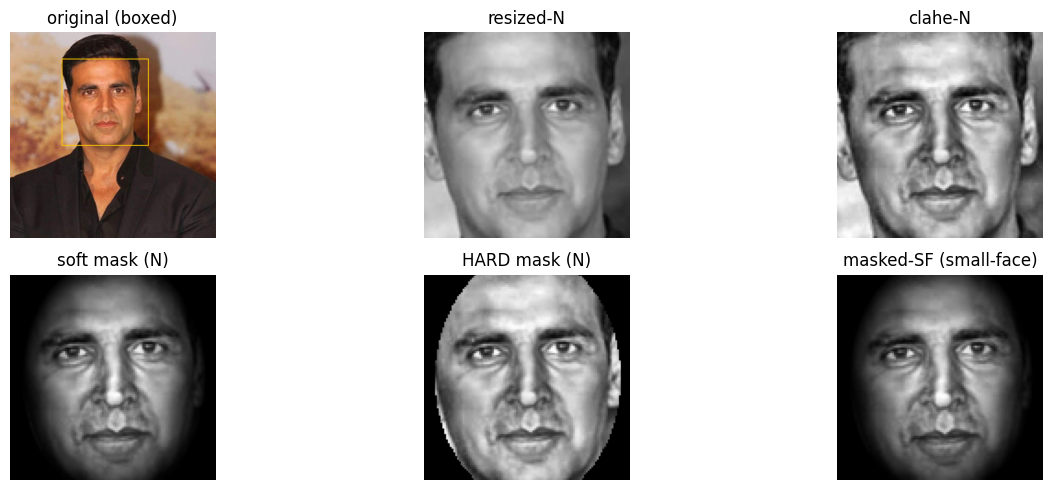

In [13]:
# === Demo on one image (normal vs small-face) — now with ORIGINAL + HARD MASK ===
import cv2, numpy as np, matplotlib.pyplot as plt

IMG_PATH = r"..\data\dataset\raw\Akshay Kumar\Akshay Kumar_1.jpg"

# Normal Haar (soft mask)
(stages_norm, info_norm) = preprocess_face(
    IMG_PATH, detect=True, small_face=False,
    return_stages=True, return_info=True
)

# Small-face Haar (soft mask)
(stages_small, info_small) = preprocess_face(
    IMG_PATH, detect=True, small_face=True,
    return_stages=True, return_info=True
)

# Normal Haar (HARD mask)
(stages_hard, info_hard) = preprocess_face(
    IMG_PATH, detect=True, small_face=False,
    return_stages=True, return_info=True, use_soft_mask=False
)

(resized_n, clahe_n, masked_n) = stages_norm
(resized_s, clahe_s, masked_s) = stages_small
(resized_h, clahe_h, masked_h) = stages_hard

# ---- Build "original (boxed)" preview using the normal detection box (fallback to small-face) ----
orig_bgr = cv2.imread(IMG_PATH)
if orig_bgr is None:
    raise FileNotFoundError(f"Cannot read image: {IMG_PATH}")

box = info_norm.get("face_box") or info_small.get("face_box")
orig_boxed = orig_bgr.copy()
if box is not None:
    x, y, w, h = box
    cv2.rectangle(orig_boxed, (x, y), (x + w, y + h), (0, 200, 255), 2)
else:
    print("Warning: no face detected in either mode; showing unboxed original.")

def show_rgb(im):
    return cv2.cvtColor(im, cv2.COLOR_BGR2RGB) if im.ndim == 3 else im

# ---- Print quick stats ----
print("[Normal]  blur r/c/m = "
      f"{info_norm['blur_raw']:.0f}/{info_norm['blur_clahe']:.0f}/{info_norm['blur_mask']:.0f}  "
      f"mean m = {info_norm['mean_mask']:.0f}  box={info_norm['face_box']}  ok={info_norm['ok']}")

print("[Small ]  blur r/c/m = "
      f"{info_small['blur_raw']:.0f}/{info_small['blur_clahe']:.0f}/{info_small['blur_mask']:.0f}  "
      f"mean m = {info_small['mean_mask']:.0f}  box={info_small['face_box']}  ok={info_small['ok']}")

print("[HardM ]  blur r/c/m = "
      f"{info_hard['blur_raw']:.0f}/{info_hard['blur_clahe']:.0f}/{info_hard['blur_mask']:.0f}  "
      f"mean m = {info_hard['mean_mask']:.0f}  box={info_hard['face_box']}  ok={info_hard['ok']}")

# ---- Plot: original + resized (normal) + CLAHE (normal) + soft mask + hard mask + masked small-face ----
tiles = [
    (show_rgb(orig_boxed), "original (boxed)"),
    (resized_n,           "resized-N"),
    (clahe_n,             "clahe-N"),
    (masked_n,            "soft mask (N)"),
    (masked_h,            "HARD mask (N)"),
    (masked_s,            "masked-SF (small-face)"),
]

plt.figure(figsize=(14, 5))
for i, (img, title) in enumerate(tiles, 1):
    plt.subplot(2, 3, i)
    plt.imshow(img, cmap=None if (img.ndim == 3) else "gray")
    plt.axis("off"); plt.title(title)
plt.tight_layout(); plt.show()


## 6.2 Evaluation
- using raw dataset to evaluate the performance of LBPH

In [18]:
# LBPH VERIFICATION (RAW -> split -> enroll/probe) — prints your metric block + ROC-AUC + EER
# Requires: pip install opencv-contrib-python numpy scikit-learn matplotlib

import os, glob, random, json
import numpy as np
import cv2
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

# ---------------- Config ----------------
RAW_ROOT         = r"..\data\dataset\raw"   # raw_root/PersonX/*.jpg
MIN_IMGS_PER_ID  = 5                        # drop IDs with fewer images
SPLIT_FRAC       = dict(train=0.7, val=0.15, test=0.15)  # must sum to 1.0
RANDOM_SEED      = 42

# Verification protocol
ENROLL_K         = 10                        # max enroll shots per ID (from train)
NEG_PER_ID       = 20                       # impostor probes sampled per target ID

# Detection & preprocess
USE_DETECTION    = True
SMALL_FACE_MODE  = True                     # more sensitive Haar + 1.5x upsample
FACE_SIZE        = (112, 112)
SHRINK_FRAC      = 0.10                     # shrink detected box to reduce background
USE_CLAHE        = True
USE_SOFT_MASK    = False                     # soft ellipse (feathered)
GRID_XY          = (8, 8)                   # OpenCV LBPH grid

# Outputs
OUT_DIR          = "../output/reports/lbph"
SAVE_OUTPUTS     = True

# ---------------- Utils: IO & split ----------------
def list_id_images_raw(root):
    idx = {}
    if not os.path.isdir(root): return idx
    for pid in sorted(os.listdir(root)):
        pdir = os.path.join(root, pid)
        if not os.path.isdir(pdir): continue
        files = []
        for patt in ("*.jpg","*.jpeg","*.png","*.bmp","*.webp","*.JPG","*.PNG"):
            files.extend(glob.glob(os.path.join(pdir, patt)))
        if len(files) >= MIN_IMGS_PER_ID:
            idx[pid] = sorted(files)
    return idx

def stratified_split(id2files, frac=SPLIT_FRAC, seed=RANDOM_SEED):
    assert abs(sum(frac.values()) - 1.0) < 1e-6, "SPLIT_FRAC must sum to 1.0"
    rng = random.Random(seed)
    tr, va, te = {}, {}, {}
    for pid, files in id2files.items():
        f = files[:]; rng.shuffle(f)
        n = len(f)
        n_tr = max(1, int(round(frac["train"] * n)))
        n_va = max(0, int(round(frac["val"] * n)))
        if n_tr + n_va > n: n_va = max(0, n - n_tr)
        n_te = max(0, n - n_tr - n_va)
        tr[pid] = f[:n_tr]; va[pid] = f[n_tr:n_tr+n_va]; te[pid] = f[n_tr+n_va:]
    return tr, va, te

# ---------------- Preprocess & detection ----------------
def _to_gray(img):
    return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) if img.ndim == 3 else img

def _soft_ellipse(gray):
    h, w = gray.shape
    Y, X = np.ogrid[:h, :w]
    cx, cy = w/2.0, h/2.0
    rx, ry = 0.45*w, 0.60*h
    d = ((X - cx)/rx)**2 + ((Y - cy)/ry)**2
    a = np.clip(1.0 - d, 0.0, 1.0)
    return (gray.astype(np.float32) * a).astype(np.uint8)

def _hard_ellipse(gray):
    h, w = gray.shape
    mask = np.zeros_like(gray, np.uint8)
    cv2.ellipse(mask, (w//2, h//2), (int(w*0.45), int(h*0.60)), 0, 0, 360, 255, -1)
    return cv2.bitwise_and(gray, mask)

def _preprocess(face_gray):
    img = cv2.resize(face_gray, FACE_SIZE, interpolation=cv2.INTER_AREA)
    if USE_CLAHE:
        clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8, 8))
        img = clahe.apply(img)
    img = _soft_ellipse(img) if USE_SOFT_MASK else _hard_ellipse(img)
    return img

def _shrink_box(x, y, w, h, frac=SHRINK_FRAC):
    dx, dy = int(w*frac), int(h*frac)
    x2, y2 = x + dx, y + dy
    w2, h2 = w - 2*dx, h - 2*dy
    if w2 < 5 or h2 < 5: return x, y, w, h
    return x2, y2, w2, h2

def _haar():
    c = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
    if c.empty(): raise RuntimeError("Failed to load Haar cascade.")
    return c

def _detect_largest(gray, cascade, small=False):
    if small:
        scale, neigh, msz, up = 1.05, 3, 40, 1.5
    else:
        scale, neigh, msz, up = 1.20, 5, 100, 1.0
    g = cv2.resize(gray, None, fx=up, fy=up, interpolation=cv2.INTER_LINEAR) if up!=1.0 else gray
    faces = cascade.detectMultiScale(g, scaleFactor=scale, minNeighbors=neigh,
                                     flags=cv2.CASCADE_SCALE_IMAGE, minSize=(msz, msz))
    if len(faces) == 0: return None
    x,y,w,h = max(faces, key=lambda b: b[2]*b[3])
    if up != 1.0:
        x, y, w, h = int(x/up), int(y/up), int(w/up), int(h/up)
    return x, y, w, h

def _detect_and_crop(img_bgr, cascade):
    gray0 = _to_gray(img_bgr)
    box = _detect_largest(gray0, cascade, small=False)
    if box is None and SMALL_FACE_MODE:
        box = _detect_largest(gray0, cascade, small=True)
    if box is None: return None
    x,y,w,h = _shrink_box(*box, frac=SHRINK_FRAC); x, y = max(0,x), max(0,y)
    crop = gray0[y:y+h, x:x+w]
    return _preprocess(crop)

# ---------------- Verification metrics ----------------
def _confusion(pos, neg, tau):
    TP = int(np.sum(pos <= tau)); FN = int(np.sum(pos > tau))
    FP = int(np.sum(neg <= tau)); TN = int(np.sum(neg > tau))
    return TP, FN, FP, TN

def _metrics(TP, FN, FP, TN):
    total = TP+FN+FP+TN
    acc = (TP+TN)/total if total else 0.0
    prec = TP/(TP+FP) if (TP+FP) else 0.0
    rec  = TP/(TP+FN) if (TP+FN) else 0.0  # TPR
    spec = TN/(TN+FP) if (TN+FP) else 0.0  # TNR
    f1 = (2*prec*rec)/(prec+rec) if (prec+rec) else 0.0
    far = FP/(FP+TN) if (FP+TN) else 0.0   # FPR
    frr = FN/(TP+FN) if (TP+FN) else 0.0
    bal = 0.5*(rec + spec)
    return dict(accuracy=acc, precision=prec, recall_TPR=rec,
                specificity_TNR=spec, F1=f1, FAR_FPR=far, FRR=frr, balanced_accuracy=bal)

def _sweep_eer(pos, neg, steps=1000):
    lo, hi = float(min(pos.min(), neg.min())), float(max(pos.max(), neg.max()))
    taus = np.linspace(lo, hi, steps)
    fnr = np.array([np.mean(pos > t) for t in taus])
    fpr = np.array([np.mean(neg <= t) for t in taus])
    i = int(np.argmin(np.abs(fnr - fpr)))
    return float(taus[i]), float(0.5*(fnr[i] + fpr[i]))

# ---------------- Main: split + evaluate ----------------
def evaluate_lbph_from_raw_print_block():
    random.seed(RANDOM_SEED); np.random.seed(RANDOM_SEED)
    if not hasattr(cv2, "face"):
        raise ImportError("cv2.face not found. Install: pip install opencv-contrib-python")

    # 1) Load raw and split
    id2files = list_id_images_raw(RAW_ROOT)
    if not id2files:
        raise RuntimeError(f"No identities with >= {MIN_IMGS_PER_ID} images found under {RAW_ROOT}")
    train_idx, val_idx, test_idx = stratified_split(id2files, SPLIT_FRAC, RANDOM_SEED)

    # Allow IDs with probes in val/test; fallback to leftover train if needed
    ids = [pid for pid in train_idx.keys() if (len(val_idx.get(pid,[]))>0 or len(test_idx.get(pid,[]))>0)]
    if not ids:
        ids = list(train_idx.keys())

    cascade = _haar() if USE_DETECTION else None
    os.makedirs(OUT_DIR, exist_ok=True)

    pos_dists, neg_dists = [], []
    used_ids, skipped = 0, 0

    for pid in ids:
        tfiles = train_idx.get(pid, [])
        if len(tfiles) == 0:
            continue
        enroll = tfiles[:]; random.shuffle(enroll)
        enroll = enroll[:max(1, min(ENROLL_K, len(enroll)))]

        # Enroll images
        enroll_imgs = []
        for fp in enroll:
            img = cv2.imread(fp)
            if img is None: skipped += 1; continue
            face = _detect_and_crop(img, cascade) if USE_DETECTION else _preprocess(_to_gray(img))
            if face is None: skipped += 1; continue
            enroll_imgs.append(face)
        if not enroll_imgs:
            continue

        model = cv2.face.LBPHFaceRecognizer_create(radius=1, neighbors=8,
                                                   grid_x=GRID_XY[0], grid_y=GRID_XY[1])
        labels = np.zeros((len(enroll_imgs),), dtype=np.int32)
        model.train(enroll_imgs, labels)
        used_ids += 1

        # POS probes
        probes_pos = val_idx.get(pid, []) + test_idx.get(pid, [])
        if not probes_pos:
            rest = tfiles[ENROLL_K:] if len(tfiles) > ENROLL_K else []
            probes_pos = rest

        for fp in probes_pos:
            img = cv2.imread(fp)
            if img is None: skipped += 1; continue
            face = _detect_and_crop(img, cascade) if USE_DETECTION else _preprocess(_to_gray(img))
            if face is None: skipped += 1; continue
            _, dist = model.predict(face)
            pos_dists.append(float(dist))

        # NEG probes
        others = [oid for oid in ids if oid != pid]
        pool = []
        for oid in others:
            pool += val_idx.get(oid, [])[:3] + test_idx.get(oid, [])[:3]
        if not pool:
            for oid in others:
                pool += train_idx.get(oid, [])[:2]
        random.shuffle(pool); pool = pool[:NEG_PER_ID]

        for fp in pool:
            img = cv2.imread(fp)
            if img is None: skipped += 1; continue
            face = _detect_and_crop(img, cascade) if USE_DETECTION else _preprocess(_to_gray(img))
            if face is None: skipped += 1; continue
            _, dist = model.predict(face)
            neg_dists.append(float(dist))

    pos = np.array(pos_dists, float); neg = np.array(neg_dists, float)
    if len(pos)==0 or len(neg)==0:
        raise RuntimeError("Not enough POS/NEG distances. Check detection success or reduce MIN_IMGS_PER_ID.")

    # τ* (near EER) & metrics
    tau_star, eer = _sweep_eer(pos, neg)
    TP, FN, FP, TN = _confusion(pos, neg, tau_star)
    M = _metrics(TP, FN, FP, TN)

    # ROC AUC with similarity = -distance
    y_true = np.concatenate([np.ones_like(pos, int), np.zeros_like(neg, int)])
    scores = np.concatenate([-pos, -neg])
    roc_auc = roc_auc_score(y_true, scores)

    # ---- Print block in your exact style ----
    def p(k, v): print(f"{k:>18}: {v:.4f}")
    p("accuracy",            M["accuracy"])
    p("precision",           M["precision"])
    p("recall_TPR",          M["recall_TPR"])
    p("specificity_TNR",     M["specificity_TNR"])
    p("F1",                  M["F1"])
    p("FAR_FPR",             M["FAR_FPR"])
    p("FRR",                 M["FRR"])
    p("balanced_accuracy",   M["balanced_accuracy"])
    p("roc_auc",             roc_auc)
    p("eer",                 eer)
    p("tau_star",            tau_star)

    # (optional) Save artifacts
    if SAVE_OUTPUTS:
        np.save(os.path.join(OUT_DIR, "pos_dists.npy"), pos)
        np.save(os.path.join(OUT_DIR, "neg_dists.npy"), neg)
        with open(os.path.join(OUT_DIR, "metrics_verification.json"), "w") as f:
            json.dump({
                "tau_star": tau_star, "eer": float(eer),
                "TP": TP, "FN": FN, "FP": FP, "TN": TN,
                "metrics_at_tau_star": {k: float(v) for k, v in M.items()},
                "roc_auc": float(roc_auc),
                "config": dict(RAW_ROOT=RAW_ROOT, MIN_IMGS_PER_ID=MIN_IMGS_PER_ID,
                               SPLIT_FRAC=SPLIT_FRAC, ENROLL_K=ENROLL_K, NEG_PER_ID=NEG_PER_ID,
                               USE_DETECTION=USE_DETECTION, SMALL_FACE_MODE=SMALL_FACE_MODE,
                               FACE_SIZE=FACE_SIZE, GRID_XY=GRID_XY, SHRINK_FRAC=SHRINK_FRAC,
                               USE_CLAHE=USE_CLAHE, USE_SOFT_MASK=USE_SOFT_MASK)
            }, f, indent=2)

        # Quick plots (optional)
        plt.figure()
        plt.hist(pos, bins=40, alpha=0.7, label="POS (genuine)")
        plt.hist(neg, bins=40, alpha=0.7, label="NEG (impostor)")
        plt.axvline(tau_star, color='k', linestyle='--', label=f"tau*={tau_star:.2f}")
        plt.title("LBPH Distances"); plt.xlabel("Distance"); plt.ylabel("Count"); plt.legend()
        plt.tight_layout(); plt.savefig(os.path.join(OUT_DIR, "dists_hist.png")); plt.close()

        taus = np.linspace(min(pos.min(),neg.min()), max(pos.max(),neg.max()), 600)
        tpr = [np.mean(pos <= t) for t in taus]
        fpr = [np.mean(neg <= t) for t in taus]
        plt.figure()
        plt.plot(fpr, tpr, label=f"AUC={roc_auc:.3f}")
        plt.plot([0,1],[0,1],'--',color='gray')
        plt.xlabel("FPR"); plt.ylabel("TPR"); plt.title("ROC (LBPH Verification)")
        plt.legend(); plt.tight_layout(); plt.savefig(os.path.join(OUT_DIR, "roc.png")); plt.close()

    return dict(metrics=M, roc_auc=roc_auc, eer=eer, tau_star=tau_star)

# ---- Run ----
_ = evaluate_lbph_from_raw_print_block()


          accuracy: 0.7269
         precision: 0.8683
        recall_TPR: 0.7267
   specificity_TNR: 0.7274
                F1: 0.7912
           FAR_FPR: 0.2726
               FRR: 0.2733
 balanced_accuracy: 0.7270
           roc_auc: 0.7950
               eer: 0.2730
          tau_star: 80.0570


# 7.0 ORB

## 7.1 functions for detection and enhancement

In [2]:
# === Cell 1: Core model + improved preprocessing (gamma+CLAHE+ROI) + ORB(mask) + verify (affine RANSAC) ===
import cv2, os, numpy as np
import matplotlib.pyplot as plt

# ----- Deterministic RANSAC (helps reproducibility in your report) -----
cv2.setRNGSeed(12345)

# ---------- Haar cascade ----------
def load_face_cascade():
    candidates = [
        "models/haarcascade_frontalface_default.xml",
        os.path.join(os.getcwd(), "haarcascade_frontalface_default.xml"),
        os.path.join(cv2.data.haarcascades, "haarcascade_frontalface_default.xml"),
    ]
    for p in candidates:
        if os.path.exists(p):
            c = cv2.CascadeClassifier(p)
            if not c.empty():
                return c
    raise IOError("Haar cascade not found. Put 'haarcascade_frontalface_default.xml' in ./models/ or project root.")

_FACE_CASCADE = load_face_cascade()

def detect_largest_face_bgr(bgr_img, scaleFactor=1.1, minNeighbors=5):
    if bgr_img is None: return None, None
    gray = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2GRAY)
    faces = _FACE_CASCADE.detectMultiScale(gray, scaleFactor, minNeighbors)
    if len(faces) == 0: return None, None
    (x, y, w, h) = max(faces, key=lambda r: r[2]*r[3])
    return (x, y, w, h), bgr_img[y:y+h, x:x+w]

# ---------- Helpers for preprocessing ----------
def percentile_clip(gray, p1=1, p99=99):
    """Clip extreme shadows/highlights then stretch to 0..255."""
    v1, v99 = np.percentile(gray, (p1, p99))
    if v99 <= v1:  # guard
        return gray
    out = np.clip((gray - v1) * (255.0 / (v99 - v1)), 0, 255).astype(np.uint8)
    return out

def apply_gamma(gray, gamma=1.0):
    """Fast gamma via LUT; gray must be uint8."""
    if gamma <= 0: 
        gamma = 1.0
    inv = 1.0 / gamma
    table = np.arange(256, dtype=np.float32) / 255.0
    table = np.power(table, inv) * 255.0
    table = np.clip(table, 0, 255).astype(np.uint8)
    return cv2.LUT(gray, table)

def choose_interpolation(src_shape, out_size):
    h, w = src_shape[:2]
    oh, ow = out_size
    # downscale → INTER_AREA, upscale → INTER_CUBIC
    return cv2.INTER_AREA if (oh < h or ow < w) else cv2.INTER_CUBIC

def ellipse_mask(shape, scale=0.92):
    """Binary elliptical mask centered inside the image (ROI vs RONI)."""
    h, w = shape[:2]
    mask = np.zeros((h, w), np.uint8)
    center = (w // 2, h // 2)
    axes = (int(w * scale / 2), int(h * scale / 2))
    cv2.ellipse(mask, center, axes, 0, 0, 360, 255, -1)
    return mask

def add_replicate_border(img, border=3):
    return cv2.copyMakeBorder(img, border, border, border, border, cv2.BORDER_REPLICATE)

# ---------- Preprocessing (keeps edges for ORB; no blur fed to ORB) ----------
def preprocess_face(bgr_face, out_size=(160,160)):
    """
    Steps:
      1) BGR->Gray
      2) Percentile clip (1..99) to remove extremes
      3) Adaptive gamma (bring mean toward mid-gray)
      4) CLAHE to improve local contrast
      5) Resize with correct interpolation
      6) Small replicate border to avoid edge artefacts
    Returns: gray uint8
    """
    gray0 = cv2.cvtColor(bgr_face, cv2.COLOR_BGR2GRAY)
    clipped = percentile_clip(gray0, 1, 99)

    # Adaptive gamma based on brightness (simple, robust)
    mean_int = float(clipped.mean())
    # darker -> gamma < 1 ; brighter -> gamma > 1 ; clamp to [0.7, 1.3]
    gamma = np.clip(1.0 + (128.0 - mean_int) / 300.0, 0.7, 1.3)
    gamma_applied = apply_gamma(clipped, gamma)

    # CLAHE for local contrast
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    eq = clahe.apply(gamma_applied)

    # Resize with proper interpolation
    interp = choose_interpolation(eq.shape, out_size)
    resized = cv2.resize(eq, out_size, interpolation=interp)

    # small border to reduce false edges impact
    final = add_replicate_border(resized, border=2)
    return final  # grayscale uint8

# ---------- ORB features (mask-aware) ----------
def extract_orb_features(gray_img, nfeatures=2000, mask=None):
    """
    ORB tuned for face patches.
    - dynamic FAST threshold (darker image -> lower threshold)
    - can accept ROI mask (ellipse) to ignore hair/background (RONI)
    """
    mean_int = float(gray_img.mean())
    fast_t = 5 if mean_int < 90 else 7  # tiny boost in low light
    orb = cv2.ORB_create(
        nfeatures=nfeatures,
        scaleFactor=1.2,
        nlevels=8,
        edgeThreshold=15,
        firstLevel=0,
        WTA_K=4,
        scoreType=cv2.ORB_HARRIS_SCORE,
        patchSize=31,
        fastThreshold=fast_t
    )
    kps, des = orb.detectAndCompute(gray_img, mask)
    return kps, des

# ---------- Matching & scoring (ratio test + affine RANSAC inliers) ----------
def match_and_score(des1, des2, ratio=0.78, require_model=True, model="affine"):
    """
    Returns (score, good_matches, inlier_mask)
      - score = #inliers if a geometric model is estimated; else len(good_matches)
      - model: "affine" (preferred) or "homography"
    """
    if des1 is None or des2 is None or len(des1) < 2 or len(des2) < 2:
        return 0, [], None

    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=False)
    knn = bf.knnMatch(des1, des2, k=2)
    good = [m for m, n in knn if m.distance < ratio * n.distance]

    inlier_mask = None
    if require_model and len(good) >= 6:
        src_pts = np.float32([ kp1[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
        dst_pts = np.float32([ kp2[m.trainIdx].pt for m in good ]).reshape(-1,1,2)
        if model == "affine":
            # Keep your original settings (stable)
            M, mask = cv2.estimateAffinePartial2D(
                src_pts, dst_pts, method=cv2.RANSAC, ransacReprojThreshold=4.0, maxIters=2000, confidence=0.99
            )
        else:
            H, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)
        if mask is not None:
            inlier_mask = mask.ravel().tolist()
            return int(np.sum(mask)), good, inlier_mask

    return len(good), good, inlier_mask

# ---------- Verify wrapper (unchanged decision rule; adds ROI mask use + extra dbg only) ----------
def verify_faces(ref_gray, cap_gray, threshold_inliers=10, threshold_goods=18, force_model="affine"):
    """
    Returns: decision (bool), score (int), dbg (dict)
      - decision uses inlier count if a model was found; otherwise good-match count.
      - thresholds kept same as your original.
    """
    global kp1, kp2

    # NEW: restrict features to face region (ellipse ROI) for both images
    ref_mask = ellipse_mask(ref_gray.shape, scale=0.92)
    cap_mask = ellipse_mask(cap_gray.shape, scale=0.92)

    kp1, des1 = extract_orb_features(ref_gray, mask=ref_mask)
    kp2, des2 = extract_orb_features(cap_gray, mask=cap_mask)

    score, good_matches, inlier_mask = match_and_score(
        des1, des2, ratio=0.78, require_model=True, model=force_model
    )

    used_metric = "inliers" if inlier_mask is not None else "good_matches"
    threshold = threshold_inliers if used_metric == "inliers" else threshold_goods
    decision = score >= threshold

    # Extra info: inlier ratio if we have a model (does not affect decision)
    inlier_ratio = (float(score) / max(1, len(good_matches))) if (inlier_mask is not None) else None

    dbg = {
        "used_metric": used_metric,
        "threshold": threshold,
        "score": score,
        "num_kp_ref": 0 if kp1 is None else len(kp1),
        "num_kp_cap": 0 if kp2 is None else len(kp2),
        "good_matches": len(good_matches),
        "inlier_mask": inlier_mask,
        "good_matches_list": good_matches,
        "inlier_ratio": inlier_ratio
    }
    return decision, score, dbg

# ---------- Draw matches (keeps your inline visualization flow) ----------
def draw_matches(ref_gray, cap_gray, matches, inlier_mask=None):
    flags = cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS
    if inlier_mask is not None:
        inlier_matches = [m for m, keep in zip(matches, inlier_mask) if keep]
        return cv2.drawMatches(ref_gray, kp1, cap_gray, kp2, inlier_matches, None, flags=flags)
    return cv2.drawMatches(ref_gray, kp1, cap_gray, kp2, matches, None, flags=flags)

# ---------- Inline display helpers (Notebook output) ----------
def _to_rgb(img):
    if img.ndim == 2:      # gray
        return img
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

def show_pair(title, left_img, right_img, left_label="Left", right_label="Right", figsize=(9,4)):
    plt.figure(figsize=figsize)
    plt.suptitle(title, fontsize=16, fontweight="bold")
    plt.subplot(1,2,1); plt.imshow(_to_rgb(left_img), cmap=None if left_img.ndim==3 else "gray")
    plt.title(left_label); plt.axis('off')
    plt.subplot(1,2,2); plt.imshow(_to_rgb(right_img), cmap=None if right_img.ndim==3 else "gray")
    plt.title(right_label); plt.axis('off')
    plt.show()

def show_single(title, img, figsize=(6,6)):
    plt.figure(figsize=figsize)
    plt.title(title, fontsize=14, fontweight="bold")
    plt.imshow(_to_rgb(img), cmap=None if img.ndim==3 else "gray")
    plt.axis('off')
    plt.show()


## 7.2 Camera Setup

In [9]:
# === Cell 2: Live camera capture (returns largest face crop in BGR) ===
import cv2

def capture_and_verify_loop(ref_image=None):
    cap = cv2.VideoCapture(0)
    captured_face = None

    print("Live camera: SPACE=capture, Q/ESC=quit")

    while True:
        ret, frame = cap.read()
        if not ret:
            print("Error: camera read failed.")
            break

        frame = cv2.flip(frame, 1)
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        faces = _FACE_CASCADE.detectMultiScale(gray, 1.1, 4)

        if len(faces) > 0:
            for (x, y, w, h) in faces:
                cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 3)
                cv2.putText(frame, "Face Detected", (x, y-10),
                            cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

        cv2.imshow("Live Camera Feed", frame)
        key = cv2.waitKey(1) & 0xFF

        if key == ord(' '):  # capture
            if len(faces) == 0:
                print("No face detected. Try again.")
                continue
            x, y, w, h = max(faces, key=lambda r: r[2]*r[3])
            captured_face = frame[y:y+h, x:x+w]
            break
        elif key in (ord('q'), 27):  # 'q' or ESC
            print("Exit.")
            break

    cap.release()
    cv2.destroyAllWindows()
    return captured_face


## 7.3 implementation of functions

Live camera: SPACE=capture, Q/ESC=quit


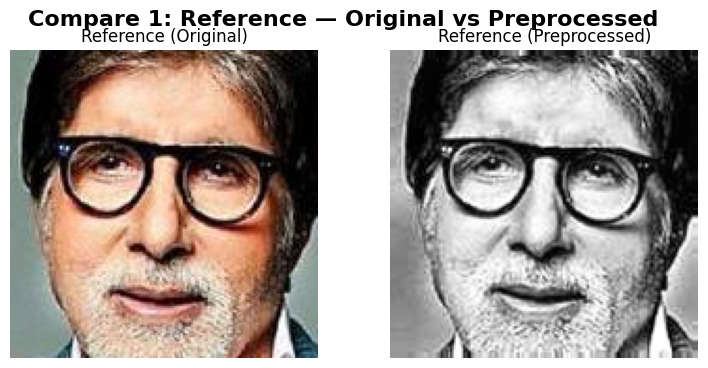

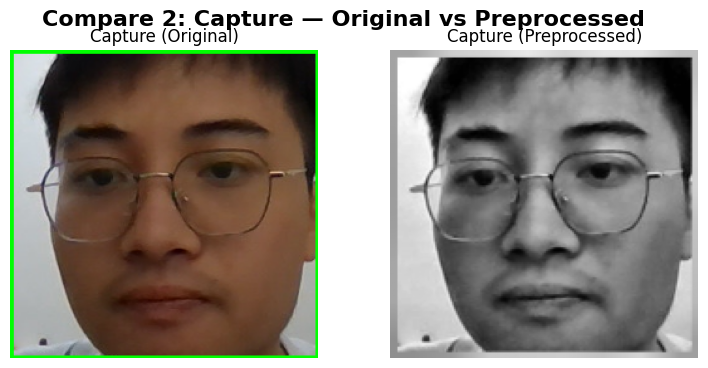

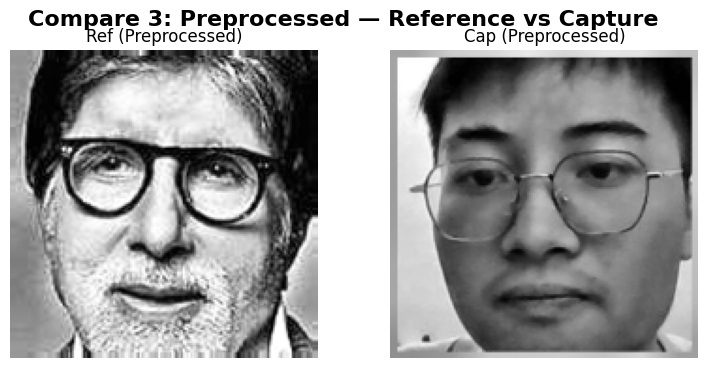

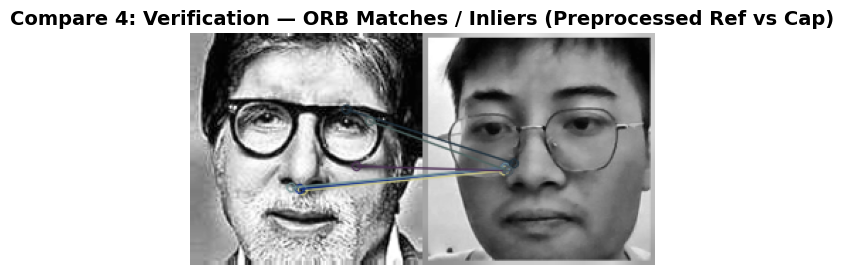

=========== FACE VERIFY SUMMARY ===========
Metric used      : inliers
Threshold        : 10
Score            : 6
Inlier ratio     : 0.09
Keypoints (ref)  : 1617
Keypoints (cap)  : 1279
Good matches     : 64
Ref mean/STD     : 141.5 / 80.1
Cap mean/STD     : 126.9 / 59.1
Decision         : NOT MATCH ❌


In [12]:
# === Cell 3: With camera — inline compares + printed summary (preprocessing upgraded) ===
import cv2, numpy as np

# 1) Load reference original (change to your file)
ref_path = r"..\data\dataset\raw\Amitabh Bachchan\Amitabh Bachchan_2.jpg"
ref_bgr = cv2.imread(ref_path)
if ref_bgr is None:
    raise FileNotFoundError(f"Cannot read reference image: {ref_path}")

# 2) Detect reference face
_, ref_face_bgr = detect_largest_face_bgr(ref_bgr)
if ref_face_bgr is None:
    raise RuntimeError("No face detected in reference image.")

# 3) Capture live face (Cell 2 unchanged)
cap_face_bgr = capture_and_verify_loop()
if cap_face_bgr is None:
    raise RuntimeError("Capture canceled or no face captured.")

# 4) Preprocess both (new pipeline)
ref_face_pp = preprocess_face(ref_face_bgr)      # gray
cap_face_pp = preprocess_face(cap_face_bgr)      # gray

# Optional (photometric parity with reference) — OFF by default:
# def match_mean_std(src, tgt_mean, tgt_std):
#     s = src.astype(np.float32)
#     s = (s - s.mean()) / (s.std() + 1e-6) * tgt_std + tgt_mean
#     return np.clip(s, 0, 255).astype(np.uint8)
# cap_face_pp = match_mean_std(cap_face_pp, ref_face_pp.mean(), ref_face_pp.std())

# 5) Show inline compares (no windows)
show_pair("Compare 1: Reference — Original vs Preprocessed",
          ref_face_bgr, ref_face_pp,
          "Reference (Original)", "Reference (Preprocessed)")

show_pair("Compare 2: Capture — Original vs Preprocessed",
          cap_face_bgr, cap_face_pp,
          "Capture (Original)", "Capture (Preprocessed)")

show_pair("Compare 3: Preprocessed — Reference vs Capture",
          ref_face_pp, cap_face_pp,
          "Ref (Preprocessed)", "Cap (Preprocessed)")

# 6) Verify and show matches (preprocessed vs preprocessed)
decision, score, dbg = verify_faces(ref_face_pp, cap_face_pp)
match_vis = draw_matches(ref_face_pp, cap_face_pp, dbg['good_matches_list'], dbg['inlier_mask'])
show_single("Compare 4: Verification — ORB Matches / Inliers (Preprocessed Ref vs Cap)", match_vis)

# 7) Print concise summary (+ a bit of quality info that's useful in report)
print("=========== FACE VERIFY SUMMARY ===========")
print(f"Metric used      : {dbg['used_metric']}")
print(f"Threshold        : {dbg['threshold']}")
print(f"Score            : {dbg['score']}")
print(f"Inlier ratio     : {dbg['inlier_ratio']:.2f}" if dbg['inlier_ratio'] is not None else "Inlier ratio     : -")
print(f"Keypoints (ref)  : {dbg['num_kp_ref']}")
print(f"Keypoints (cap)  : {dbg['num_kp_cap']}")
print(f"Good matches     : {dbg['good_matches']}")
print(f"Ref mean/STD     : {ref_face_pp.mean():.1f} / {ref_face_pp.std():.1f}")
print(f"Cap mean/STD     : {cap_face_pp.mean():.1f} / {cap_face_pp.std():.1f}")
print(f"Decision         : {'MATCH ✅' if decision else 'NOT MATCH ❌'}")
print("===========================================")


## 7.4 Evaluation

          accuracy: 0.7133
         precision: 0.8779
        recall_TPR: 0.6937
   specificity_TNR: 0.7616
                F1: 0.7750
           FAR_FPR: 0.2384
               FRR: 0.3063
 balanced_accuracy: 0.7276
           roc_auc: 0.7891
               eer: 0.2724
          tau_star: 12.0931


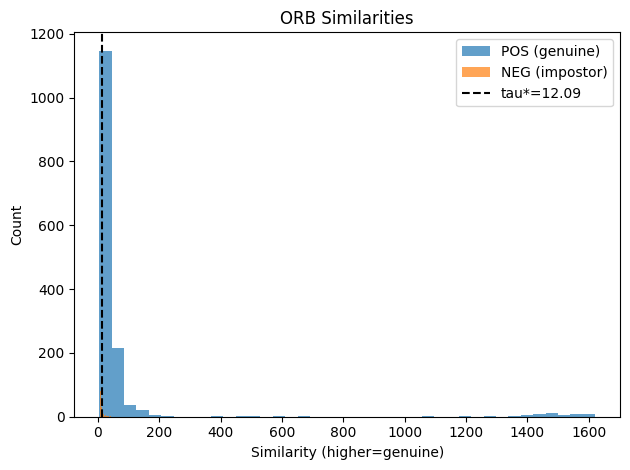

C:\Users\jians\AppData\Local\Temp\ipykernel_6564\198137883.py:211: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  auc = np.trapz(np.interp(np.linspace(0,1,len(fpr)), np.sort(fpr), np.array(tpr)[np.argsort(fpr)]), np.linspace(0,1,len(fpr)))


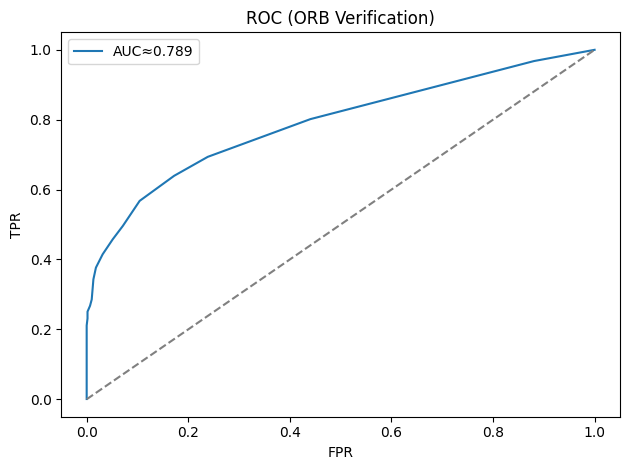

In [3]:
# === Cell 2: ORB Verification eval (uses Cell-1 preprocess + ORB + affine RANSAC) ===
import os, glob, random, json
import numpy as np
import cv2
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

# ---------------- Config ----------------
RAW_ROOT         = r"..\data\dataset\raw"   # raw_root/PersonX/*.jpg
MIN_IMGS_PER_ID  = 3
SPLIT_FRAC       = dict(train=0.7, val=0.15, test=0.15)  # must sum to 1.0
RANDOM_SEED      = 42

ENROLL_K         = 5                        # max enroll shots per ID (from train)
NEG_PER_ID       = 20                       # impostor probes per target ID

PLOT             = True                     # quick hist/roc

# ---------------- IO & split ----------------
def list_id_images_raw(root):
    idx = {}
    if not os.path.isdir(root): return idx
    for pid in sorted(os.listdir(root)):
        pdir = os.path.join(root, pid)
        if not os.path.isdir(pdir): continue
        files = []
        for patt in ("*.jpg","*.jpeg","*.png","*.bmp","*.webp","*.JPG","*.PNG"):
            files.extend(glob.glob(os.path.join(pdir, patt)))
        if len(files) >= MIN_IMGS_PER_ID:
            idx[pid] = sorted(files)
    return idx

def stratified_split(id2files, frac=SPLIT_FRAC, seed=RANDOM_SEED):
    assert abs(sum(frac.values()) - 1.0) < 1e-6, "SPLIT_FRAC must sum to 1.0"
    rng = random.Random(seed)
    tr, va, te = {}, {}, {}
    for pid, files in id2files.items():
        f = files[:]; rng.shuffle(f)
        n = len(f)
        n_tr = max(1, int(round(frac["train"] * n)))
        n_va = max(0, int(round(frac["val"] * n)))
        if n_tr + n_va > n: n_va = max(0, n - n_tr)
        n_te = max(0, n - n_tr - n_va)
        tr[pid] = f[:n_tr]
        va[pid] = f[n_tr:n_tr+n_va]
        te[pid] = f[n_tr+n_va:]
    return tr, va, te

# ---------------- Helpers (use your Cell-1 functions) ----------------
def load_face_and_preprocess(path):
    """Read BGR, detect largest face, then apply your preprocess_face; returns gray or None."""
    bgr = cv2.imread(path)
    if bgr is None:
        return None
    box, crop = detect_largest_face_bgr(bgr)  # from your Cell 1
    if crop is None:
        return None
    gray = preprocess_face(crop)              # from your Cell 1 (gamma+CLAHE+resize+border)
    return gray

def best_score_vs_templates(enroll_grays, probe_gray):
    """Max verify score across multiple enroll images (uses your verify_faces)."""
    if probe_gray is None or not enroll_grays:
        return 0.0
    best = 0.0
    for ref in enroll_grays:
        # verify_faces returns (decision, score, dbg); we use the raw score
        _, score, _ = verify_faces(ref, probe_gray, threshold_inliers=99999, threshold_goods=99999)
        if score > best:
            best = float(score)
    return best

# ---------------- Metrics (similarity-based) ----------------
def confusion_sim(pos_s, neg_s, tau):
    TP = int(np.sum(pos_s >= tau)); FN = int(np.sum(pos_s <  tau))
    FP = int(np.sum(neg_s >= tau)); TN = int(np.sum(neg_s <  tau))
    return TP, FN, FP, TN

def metric_block(TP, FN, FP, TN):
    total = TP+FN+FP+TN
    acc  = (TP+TN)/total if total else 0.0
    prec = TP/(TP+FP) if (TP+FP) else 0.0
    rec  = TP/(TP+FN) if (TP+FN) else 0.0  # TPR
    spec = TN/(TN+FP) if (TN+FP) else 0.0  # TNR
    f1   = (2*prec*rec)/(prec+rec) if (prec+rec) else 0.0
    far  = FP/(FP+TN) if (FP+TN) else 0.0  # FPR
    frr  = FN/(TP+FN) if (TP+FN) else 0.0
    bal  = 0.5*(rec + spec)
    return dict(accuracy=acc, precision=prec, recall_TPR=rec,
                specificity_TNR=spec, F1=f1, FAR_FPR=far, FRR=frr, balanced_accuracy=bal)

def tau_eer_sim(pos_s, neg_s, steps=1000):
    lo, hi = float(min(pos_s.min(), neg_s.min())), float(max(pos_s.max(), neg_s.max()))
    taus = np.linspace(lo, hi, steps)
    fnr = np.array([np.mean(pos_s <  t) for t in taus])   # genuine rejected
    fpr = np.array([np.mean(neg_s >= t) for t in taus])   # impostor accepted
    i = int(np.argmin(np.abs(fnr - fpr)))
    return float(taus[i]), float(0.5*(fnr[i] + fpr[i]))

# ---------------- Main evaluation ----------------
def evaluate_orb_verify():
    random.seed(RANDOM_SEED); np.random.seed(RANDOM_SEED)

    id2files = list_id_images_raw(RAW_ROOT)
    if not id2files:
        raise RuntimeError(f"No identities with >= {MIN_IMGS_PER_ID} images under {RAW_ROOT}")

    train_idx, val_idx, test_idx = stratified_split(id2files, SPLIT_FRAC, RANDOM_SEED)
    ids = [pid for pid in train_idx if (len(val_idx.get(pid,[]))>0 or len(test_idx.get(pid,[]))>0)]
    if not ids:
        ids = list(train_idx.keys())

    pos_sims, neg_sims = [], []
    used_ids, skipped = 0, 0

    for pid in ids:
        tfiles = train_idx.get(pid, [])
        if not tfiles:
            continue

        # ---- Enroll (≤ ENROLL_K) ----
        enroll_files = tfiles[:]
        random.shuffle(enroll_files)
        enroll_files = enroll_files[:max(1, min(ENROLL_K, len(enroll_files)))]

        enroll_grays = []
        for fp in enroll_files:
            g = load_face_and_preprocess(fp)
            if g is None:
                skipped += 1
                continue
            enroll_grays.append(g)

        if not enroll_grays:
            continue
        used_ids += 1

        # ---- POS probes: val+test (fallback leftover train) ----
        probes_pos = val_idx.get(pid, []) + test_idx.get(pid, [])
        if not probes_pos:
            rest = tfiles[ENROLL_K:] if len(tfiles) > ENROLL_K else []
            probes_pos = rest

        for fp in probes_pos:
            g = load_face_and_preprocess(fp)
            if g is None:
                skipped += 1
                continue
            s = best_score_vs_templates(enroll_grays, g)
            pos_sims.append(s)

        # ---- NEG probes: sample other IDs (prefer val+test) ----
        others = [oid for oid in ids if oid != pid]
        pool = []
        for oid in others:
            pool += val_idx.get(oid, [])[:3] + test_idx.get(oid, [])[:3]
        if not pool:
            for oid in others:
                pool += train_idx.get(oid, [])[:2]
        random.shuffle(pool); pool = pool[:NEG_PER_ID]

        for fp in pool:
            g = load_face_and_preprocess(fp)
            if g is None:
                skipped += 1
                continue
            s = best_score_vs_templates(enroll_grays, g)
            neg_sims.append(s)

    pos_s = np.array(pos_sims, float); neg_s = np.array(neg_sims, float)
    if len(pos_s)==0 or len(neg_s)==0:
        raise RuntimeError("Not enough POS/NEG scores. Check detection success or dataset size.")

    # ---- τ* near-EER on similarity & metrics ----
    tau_star, eer = tau_eer_sim(pos_s, neg_s)
    TP, FN, FP, TN = confusion_sim(pos_s, neg_s, tau_star)
    M = metric_block(TP, FN, FP, TN)

    # ROC-AUC on similarity (higher = genuine)
    y_true = np.concatenate([np.ones_like(pos_s, int), np.zeros_like(neg_s, int)])
    scores = np.concatenate([pos_s, neg_s])
    roc_auc = roc_auc_score(y_true, scores)

    # ---- Print block (your exact format) ----
    def p(k, v): print(f"{k:>18}: {v:.4f}")
    p("accuracy",            M["accuracy"])
    p("precision",           M["precision"])
    p("recall_TPR",          M["recall_TPR"])
    p("specificity_TNR",     M["specificity_TNR"])
    p("F1",                  M["F1"])
    p("FAR_FPR",             M["FAR_FPR"])
    p("FRR",                 M["FRR"])
    p("balanced_accuracy",   M["balanced_accuracy"])
    p("roc_auc",             roc_auc)
    p("eer",                 eer)
    p("tau_star",            tau_star)

    # ---- Quick plots (optional) ----
    if PLOT:
        plt.figure()
        plt.hist(pos_s, bins=40, alpha=0.7, label="POS (genuine)")
        plt.hist(neg_s, bins=40, alpha=0.7, label="NEG (impostor)")
        plt.axvline(tau_star, color='k', linestyle='--', label=f"tau*={tau_star:.2f}")
        plt.title("ORB Similarities"); plt.xlabel("Similarity (higher=genuine)"); plt.ylabel("Count"); plt.legend()
        plt.tight_layout(); plt.show()

        # ROC
        taus = np.linspace(min(pos_s.min(),neg_s.min()), max(pos_s.max(),neg_s.max()), 600)
        tpr = [np.mean(pos_s >= t) for t in taus]
        fpr = [np.mean(neg_s >= t) for t in taus]
        auc = np.trapz(np.interp(np.linspace(0,1,len(fpr)), np.sort(fpr), np.array(tpr)[np.argsort(fpr)]), np.linspace(0,1,len(fpr)))
        plt.figure()
        plt.plot(fpr, tpr, label=f"AUC≈{roc_auc:.3f}")
        plt.plot([0,1],[0,1],'--',color='gray')
        plt.xlabel("FPR"); plt.ylabel("TPR"); plt.title("ROC (ORB Verification)"); plt.legend()
        plt.tight_layout(); plt.show()

    return dict(metrics=M, roc_auc=float(roc_auc), eer=float(eer), tau_star=float(tau_star))

# ---- Run ----
result = evaluate_orb_verify()



## 7.5 Save the result

In [22]:
import os, json, numpy as np

M        = result["metrics"]
roc_auc  = float(result["roc_auc"])
eer      = float(result["eer"])
tau_star = float(result["tau_star"])

def to_float(x):
    if isinstance(x, (np.floating, np.integer)):
        return float(x)
    return float(x)

orb_metrics = {
    "accuracy":            to_float(M["accuracy"]),
    "precision":           to_float(M["precision"]),
    "recall_TPR":          to_float(M["recall_TPR"]),
    "specificity_TNR":     to_float(M["specificity_TNR"]),
    "F1":                  to_float(M["F1"]),
    "FAR_FPR":             to_float(M["FAR_FPR"]),
    "FRR":                 to_float(M["FRR"]),
    "balanced_accuracy":   to_float(M["balanced_accuracy"]),
    "roc_auc":             roc_auc,
    "eer":                 eer,
    "tau_star":            tau_star
}

out_dir = "../output/reports/orb"
os.makedirs(out_dir, exist_ok=True)
out_path = os.path.join(out_dir, "metrics_verification.json")

with open(out_path, "w") as f:
    json.dump(orb_metrics, f, indent=2)

print(f"✅ Saved ORB metrics to {out_path}")

✅ Saved ORB metrics to ../output/reports/orb\metrics_verification.json


# 8.0 Conclusion: Comparison

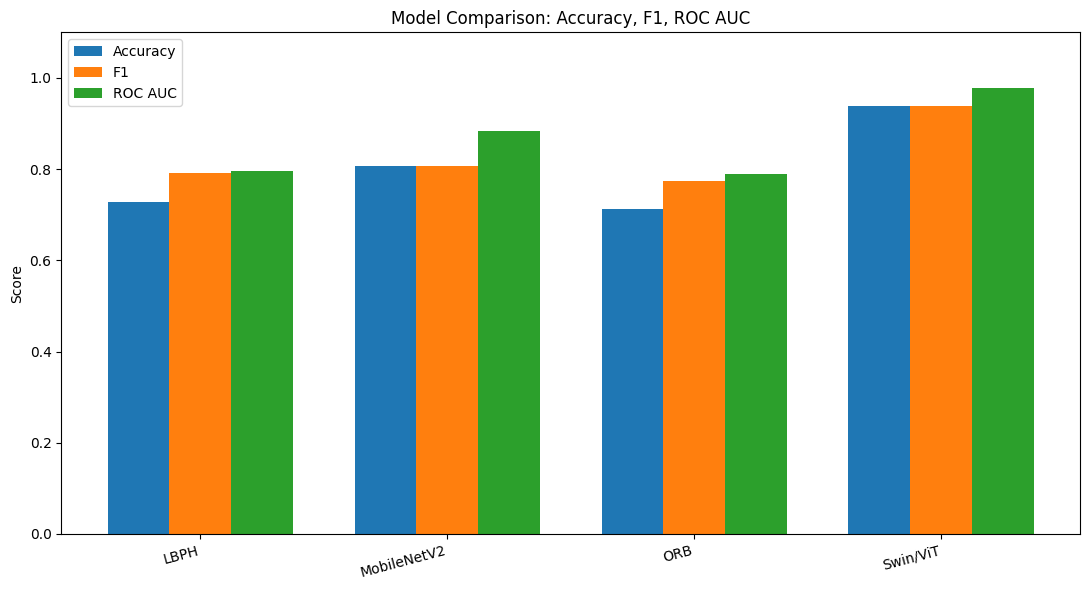

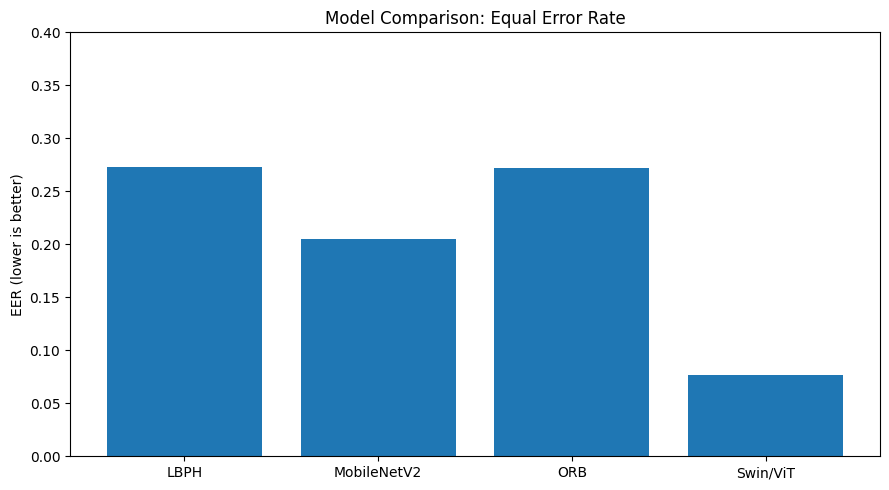


Best by Accuracy: Swin/ViT
  accuracy=0.9377, F1=0.9379, roc_auc=0.9781, eer=0.0763


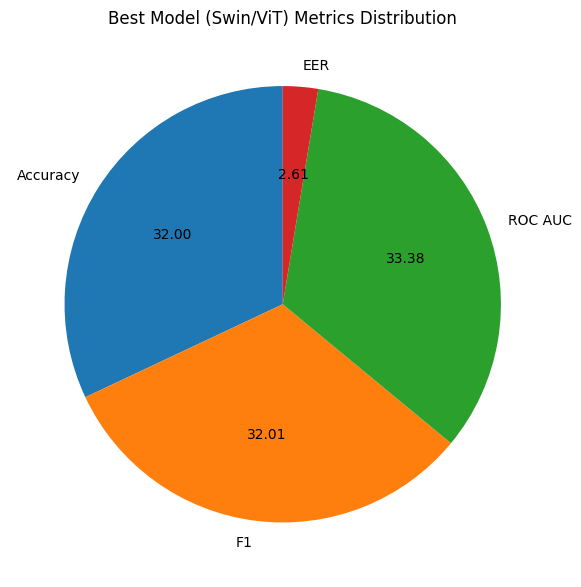

In [23]:
import json, os
import matplotlib.pyplot as plt
import numpy as np

# ---------- Config ----------
MODEL_SUBDIRS = {
    'LBPH':       'lbph',
    'MobileNetV2':'mnet',
    'ORB':        'ORB',   # note: this folder was saved under ../output/report/ORB
    'Swin/ViT':   'vit',
}
CANDIDATE_ROOTS = [ '../output/reports']  # try both

# ---------- Helpers ----------
def find_first_existing(*paths):
    """Return the first existing path, else None."""
    for p in paths:
        if os.path.exists(p):
            return p
    return None

def load_json_safely(path):
    try:
        with open(path, 'r') as f:
            return json.load(f)
    except FileNotFoundError:
        print(f"[WARN] File not found: {path}")
    except json.JSONDecodeError as e:
        print(f"[WARN] JSON decode error in {path}: {e}")
    return None

def normalize_metrics(raw):
    #Normalize various possible JSON structures to a flat dict of metrics.
    if raw is None:
        return None

    # If it's a list (e.g., multiple runs), pick the one with best accuracy
    if isinstance(raw, list):
        if not raw:
            return None
        cand = max(raw, key=lambda x: x.get('accuracy', 0))
        return normalize_metrics(cand)

    # If dict with nested metrics
    if isinstance(raw, dict) and 'metrics_at_tau_star' in raw:
        base = dict(raw['metrics_at_tau_star'])  # copy
        # add top-level extras if present
        for k in ('roc_auc', 'eer', 'tau_star'):
            if k in raw:
                base[k] = raw[k]
        return base

    # If already a flat dict with fields
    if isinstance(raw, dict):
        return raw

    return None

def metrics_to_float(m):
    """Coerce all numeric values to float where applicable."""
    out = {}
    for k, v in m.items():
        try:
            out[k] = float(v)
        except Exception:
            out[k] = v
    return out

# ---------- Load & normalize ----------
metrics = {}
for model, subdir in MODEL_SUBDIRS.items():
    # Try both roots
    target_paths = [
        os.path.join(root, subdir, 'metrics_verification.json')
        for root in CANDIDATE_ROOTS
    ]
    json_path = find_first_existing(*target_paths)
    if not json_path:
        print(f"[WARN] Missing metrics for {model}. Tried: {target_paths}")
        continue

    raw = load_json_safely(json_path)
    norm = normalize_metrics(raw)
    if norm is None:
        print(f"[WARN] Could not normalize metrics for {model} from {json_path}")
        continue

    metrics[model] = metrics_to_float(norm)

# Bail out if nothing loaded
if not metrics:
    raise RuntimeError("No metrics could be loaded. Check paths and files.")

# ---------- Prepare arrays for plotting ----------
models = list(metrics.keys())

def get_or_zero(m, key):
    return metrics[m].get(key, 0.0)

accuracy = [get_or_zero(m, 'accuracy') for m in models]
f1       = [get_or_zero(m, 'F1') for m in models]
roc_auc  = [get_or_zero(m, 'roc_auc') for m in models]
eer      = [get_or_zero(m, 'eer') or get_or_zero(m, 'EER') for m in models]  # support EER alt key
# Optional extras if you want them later:
# recall_TPR = [get_or_zero(m, 'recall_TPR') for m in models]
# specificity_TNR = [get_or_zero(m, 'specificity_TNR') for m in models]

# ---------- Bar chart: Accuracy, F1, ROC AUC ----------
x = np.arange(len(models))
width = 0.25
fig, ax = plt.subplots(figsize=(11,6))
ax.bar(x - width, accuracy, width, label='Accuracy')
ax.bar(x,         f1,       width, label='F1')
ax.bar(x + width, roc_auc,  width, label='ROC AUC')
ax.set_ylabel('Score')
ax.set_title('Model Comparison: Accuracy, F1, ROC AUC')
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=15, ha='right')
ax.legend()
plt.ylim(0, 1.1)
plt.tight_layout()
plt.show()

# ---------- Bar chart: EER (lower is better) ----------
fig, ax = plt.subplots(figsize=(9,5))
ax.bar(models, eer)
ax.set_ylabel('EER (lower is better)')
ax.set_title('Model Comparison: Equal Error Rate')
plt.ylim(0, max(0.4, max(eer)+0.05))
plt.tight_layout()
plt.show()

# ---------- Pie chart for best-accuracy model ----------
best_idx = int(np.argmax(accuracy))
best_model = models[best_idx]
best_acc   = accuracy[best_idx]
best_f1    = f1[best_idx]
best_auc   = roc_auc[best_idx]
best_eer   = eer[best_idx]

print(f"\nBest by Accuracy: {best_model}")
print(f"  accuracy={best_acc:.4f}, F1={best_f1:.4f}, roc_auc={best_auc:.4f}, eer={best_eer:.4f}")

# (Optional) Pie can be misleading mixing a "lower-is-better" metric with others.
# If you still want it, include EER as-is:
labels = ['Accuracy', 'F1', 'ROC AUC', 'EER']
pie_vals = [best_acc, best_f1, best_auc, best_eer]

fig, ax = plt.subplots(figsize=(6,6))
ax.pie(pie_vals, labels=labels, autopct='%1.2f', startangle=90)
ax.set_title(f'Best Model ({best_model}) Metrics Distribution')
plt.tight_layout()
plt.show()